<a href="https://colab.research.google.com/github/crisRkr/ATP-Matches-Analysis/blob/main/Technical_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Case


# **Methodology**

To carry out the performance analysis, the KDD (Knowledge Discovery in Databases) methodology will be implemented.

Perform the selection, preprocessing, and modeling of data using the libraries, functions, and methods known.











# **Data Sources**


The data used corresponds to the travel records and surveys of the travel company's users.

# **Data Analysis**

# 1. Import Libraries and Modules


Initially I imported the libraries and modules required to work with the data.

Additionally, the FeatureSelector class is imported, a file that is attached too. FeatureSelector allows you to analyze missing values, identify the value of correlations, etc.

In [11]:
# carga de datos
import numpy as np
import pandas as pd
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import seaborn as sns
import io
from google.colab import files

# manipulación y visualización
import matplotlib.pyplot as plt
import itertools
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# machine learning
from Feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score


from sklearn.utils import resample,shuffle#

# 2. Load Data

We load the data into the environment as a dataframe to be able to work with it with the functionalities that Google Colab allows us.

In [14]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
    return df

In [15]:
Data = upload_files()
Data.head()

Saving Viajes.csv to Viajes (1).csv
User uploaded file "Viajes (1).csv" with length 5270874 bytes


,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos
0,98800001,Femenino,Fidelizado,52.0,NaN,Business,272,0.0,5.0
1,98800002,Masculino,Fidelizado,48.0,Personal,Eco,2200,9.0,0.0
2,98800003,Femenino,Fidelizado,43.0,Negocios,Business,1061,77.0,119.0
3,98800004,Femenino,Fidelizado,44.0,Negocios,Business,780,13.0,18.0
4,98800005,Femenino,Fidelizado,50.0,Negocios,Business,1981,0.0,0.0


I query the variable formats using info(). It is observed that the majority of the attributes are of numerical type.

At this point I review the attributes of the loaded table,


In [16]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94000 non-null  int64  
 1   Genero                  93923 non-null  object 
 2   Tipo_Cliente            85078 non-null  object 
 3   Edad                    93968 non-null  float64
 4   Tipo_Viaje              84801 non-null  object 
 5   Clase_Viaje             94000 non-null  object 
 6   Distancia_Viaje         94000 non-null  int64  
 7   Demora_Salida_Minutos   93943 non-null  float64
 8   Demora_Llegada_Minutos  93644 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


In [17]:
print(Data.shape)

(94000, 9)


In [18]:
print(Data.dtypes)

ID                          int64
Genero                     object
Tipo_Cliente               object
Edad                      float64
Tipo_Viaje                 object
Clase_Viaje                object
Distancia_Viaje             int64
Demora_Salida_Minutos     float64
Demora_Llegada_Minutos    float64
dtype: object


In [19]:
Data.columns

Index(['ID', 'Genero', 'Tipo_Cliente', 'Edad', 'Tipo_Viaje', 'Clase_Viaje',
       'Distancia_Viaje', 'Demora_Salida_Minutos', 'Demora_Llegada_Minutos'],
      dtype='object')

In [20]:
df_numeric = Data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['ID' 'Edad' 'Distancia_Viaje' 'Demora_Salida_Minutos'
 'Demora_Llegada_Minutos']


In [21]:
df_non_numeric = Data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Genero' 'Tipo_Cliente' 'Tipo_Viaje' 'Clase_Viaje']


In [22]:
Data.duplicated().value_counts()

False    94000
dtype: int64

In [23]:
Data.isnull().sum()

ID                           0
Genero                      77
Tipo_Cliente              8922
Edad                        32
Tipo_Viaje                9199
Clase_Viaje                  0
Distancia_Viaje              0
Demora_Salida_Minutos       57
Demora_Llegada_Minutos     356
dtype: int64

Another method to analyze null values ​​is through a heatmap, in which the columns that present missing values ​​are displayed in different colors.

<Axes: >

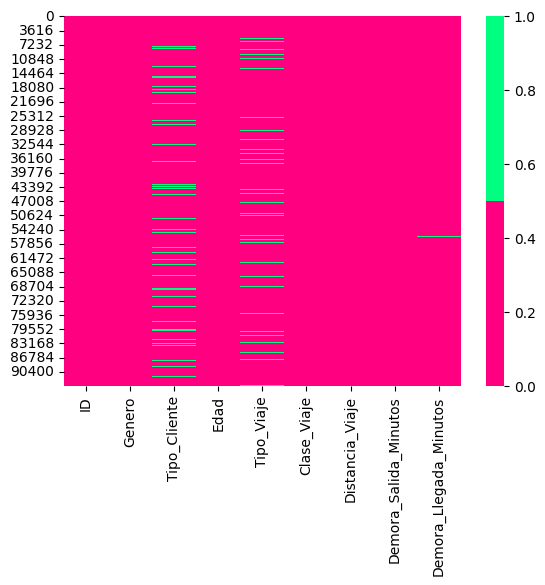

In [24]:
cols = Data.columns[:15]
colours = ['#ff0080', '#00ff80']
sns.heatmap(Data[cols].isnull(), cmap=sns.color_palette(colours))

ID - 0%
Genero - 0%
Tipo_Cliente - 9%
Edad - 0%
Tipo_Viaje - 10%
Clase_Viaje - 0%
Distancia_Viaje - 0%
Demora_Salida_Minutos - 0%
Demora_Llegada_Minutos - 0%


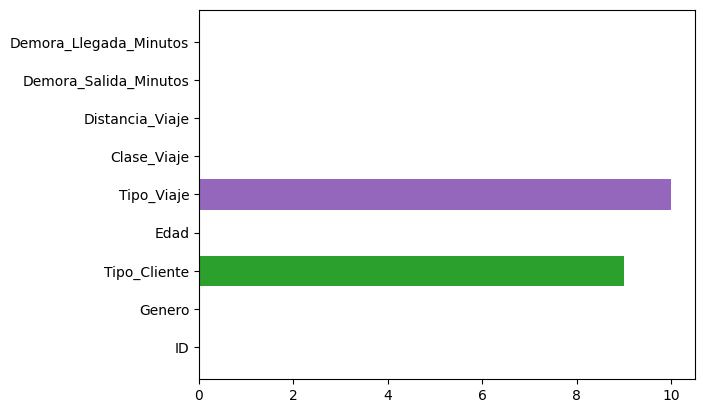

In [25]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

I use feature selector to identify the number of missing values ​​for each attribute and if there are attributes that exceed 80% missing values ​​in their records.

In [26]:
fs = FeatureSelector(data = Data, labels = Data.columns)
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



In [27]:
fs.missing_stats

,missing_fraction
Tipo_Viaje,0.097862
Tipo_Cliente,0.094915
Demora_Llegada_Minutos,0.003787
Genero,0.000819
Demora_Salida_Minutos,0.000606
Edad,0.000340
ID,0.000000
Clase_Viaje,0.000000
Distancia_Viaje,0.000000


I checked if the data is balanced, so i grouped them by genre which shows me that the data is indeed balanced since there is an equitable distribution in the number of customers of each gender.

In [28]:
Data.groupby(['Genero'])['Genero'].count()

Genero
Femenino     47640
Masculino    46283
Name: Genero, dtype: int64

<Axes: >

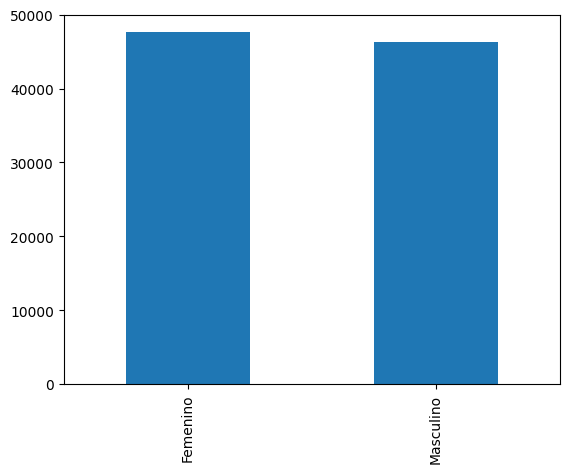

In [29]:
Data['Genero'].value_counts().plot.bar()

I proceed to load the other datasets to be used in order to add value to the performance analysis and additionally obtain a better result in the modeling phase.

In [30]:
Survey = upload_files()
Survey.head()

Saving Survey.csv to Survey.csv
User uploaded file "Survey.csv" with length 13920538 bytes


,ID,Experiencia_Satisfactoria,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online
0,98800001,0,Necesita Mejora,Plus,Excelente,Excelente,Muy Conveniente,Bien,Necesita Mejora,Aceptable,Necesita Mejora,Necesita Mejora,Aceptable,Necesita Mejora,Bien,Necesita Mejora,Pobre
1,98800002,0,Pobre,Ordinario,Excelente,Pobre,Necesita Mejora,Bien,Pobre,Bien,Bien,Excelente,Necesita Mejora,Pobre,Necesita Mejora,Bien,Bien
2,98800003,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Necesita Mejora,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Excelente
3,98800004,0,Aceptable,Ordinario,Necesita Mejora,NaN,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Aceptable
4,98800005,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Necesita Mejora,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Bien,Bien


I use this function to have a complete display of all the attributes of the dataset.

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
print(Survey.dtypes)

ID                            int64
Experiencia_Satisfactoria     int64
Comodidad_Asiento            object
Clase_Asiento                object
Tiempo_Llegada               object
Alimentacion                 object
Ubicacion_Plataforma         object
Wifi_A_Bordo                 object
Entretenimiento_A_Bordo      object
Soporte_Online               object
Reserva_Online               object
Servicio_A_Bordo             object
Espacio_Piernas              object
Manejo_Equipaje              object
Servicio_CheckIn             object
Limpieza                     object
Embarque_Online              object
dtype: object


I proceed to join the datasets taking advantage of the fact that the "ID" attribute exists in both dataframes, so I perform the crossing through a left join on the main table (Data)

In [33]:
Data=Data.merge(Survey, on='ID', how='left')
Data

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online
0,98800001,Femenino,Fidelizado,52.0,NaN,Business,272,0.0,5.0,0,Necesita Mejora,Plus,Excelente,Excelente,Muy Conveniente,Bien,Necesita Mejora,Aceptable,Necesita Mejora,Necesita Mejora,Aceptable,Necesita Mejora,Bien,Necesita Mejora,Pobre
1,98800002,Masculino,Fidelizado,48.0,Personal,Eco,2200,9.0,0.0,0,Pobre,Ordinario,Excelente,Pobre,Necesita Mejora,Bien,Pobre,Bien,Bien,Excelente,Necesita Mejora,Pobre,Necesita Mejora,Bien,Bien
2,98800003,Femenino,Fidelizado,43.0,Negocios,Business,1061,77.0,119.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Necesita Mejora,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Excelente
3,98800004,Femenino,Fidelizado,44.0,Negocios,Business,780,13.0,18.0,0,Aceptable,Ordinario,Necesita Mejora,NaN,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Aceptable
4,98800005,Femenino,Fidelizado,50.0,Negocios,Business,1981,0.0,0.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Necesita Mejora,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Bien,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,Femenino,No Leal,44.0,Negocios,Eco,1280,0.0,0.0,0,Pobre,Plus,Muy Pobre,Pobre,Manejable,Aceptable,Pobre,Aceptable,Aceptable,Necesita Mejora,Pobre,Bien,Pobre,Bien,Aceptable
93996,98893997,Masculino,Fidelizado,70.0,Personal,Eco,2352,0.0,0.0,0,Pobre,Plus,Bien,NaN,No Conveniente,Excelente,Muy Pobre,Excelente,Excelente,Aceptable,Bien,Aceptable,Aceptable,Excelente,Excelente
93997,98893998,Femenino,Fidelizado,43.0,Negocios,Business,5652,202.0,207.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Bien,Excelente,Excelente,Excelente
93998,98893999,Masculino,Fidelizado,44.0,Negocios,Business,1184,19.0,4.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Aceptable,Bien,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente


I repeat the process carried out with the first dataset to validate the attributes of the consolidated dataset.

In [34]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94000 entries, 0 to 93999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         94000 non-null  int64  
 1   Genero                     93923 non-null  object 
 2   Tipo_Cliente               85078 non-null  object 
 3   Edad                       93968 non-null  float64
 4   Tipo_Viaje                 84801 non-null  object 
 5   Clase_Viaje                94000 non-null  object 
 6   Distancia_Viaje            94000 non-null  int64  
 7   Demora_Salida_Minutos      93943 non-null  float64
 8   Demora_Llegada_Minutos     93644 non-null  float64
 9   Experiencia_Satisfactoria  94000 non-null  int64  
 10  Comodidad_Asiento          93939 non-null  object 
 11  Clase_Asiento              94000 non-null  object 
 12  Tiempo_Llegada             85104 non-null  object 
 13  Alimentacion               85301 non-null  obj

In [35]:
print(Data.shape)

(94000, 25)


In [36]:
Data.columns

Index(['ID', 'Genero', 'Tipo_Cliente', 'Edad', 'Tipo_Viaje', 'Clase_Viaje',
       'Distancia_Viaje', 'Demora_Salida_Minutos', 'Demora_Llegada_Minutos',
       'Experiencia_Satisfactoria', 'Comodidad_Asiento', 'Clase_Asiento',
       'Tiempo_Llegada', 'Alimentacion', 'Ubicacion_Plataforma',
       'Wifi_A_Bordo', 'Entretenimiento_A_Bordo', 'Soporte_Online',
       'Reserva_Online', 'Servicio_A_Bordo', 'Espacio_Piernas',
       'Manejo_Equipaje', 'Servicio_CheckIn', 'Limpieza', 'Embarque_Online'],
      dtype='object')

In [37]:
df_numeric = Data.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['ID' 'Edad' 'Distancia_Viaje' 'Demora_Salida_Minutos'
 'Demora_Llegada_Minutos' 'Experiencia_Satisfactoria']


In [38]:
df_non_numeric = Data.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Genero' 'Tipo_Cliente' 'Tipo_Viaje' 'Clase_Viaje' 'Comodidad_Asiento'
 'Clase_Asiento' 'Tiempo_Llegada' 'Alimentacion' 'Ubicacion_Plataforma'
 'Wifi_A_Bordo' 'Entretenimiento_A_Bordo' 'Soporte_Online'
 'Reserva_Online' 'Servicio_A_Bordo' 'Espacio_Piernas' 'Manejo_Equipaje'
 'Servicio_CheckIn' 'Limpieza' 'Embarque_Online']


In [39]:
Data.duplicated().value_counts()

False    94000
dtype: int64

I export the union of the data sets in an excel file, to save a backup copy of the consolidated data.

In [40]:
Data.to_excel('DataOriginal.xlsx', index = False)

# 3. Data Preprocessing

At this point, the cleaning and transformation of attributes is carried out with the aim of preparing the data before its analysis. For which data cleaning, data transformation and data reduction were carried out. This allowed the data to be used in a better way and generate a more complete analysis.

In [41]:
Data

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online
0,98800001,Femenino,Fidelizado,52.0,NaN,Business,272,0.0,5.0,0,Necesita Mejora,Plus,Excelente,Excelente,Muy Conveniente,Bien,Necesita Mejora,Aceptable,Necesita Mejora,Necesita Mejora,Aceptable,Necesita Mejora,Bien,Necesita Mejora,Pobre
1,98800002,Masculino,Fidelizado,48.0,Personal,Eco,2200,9.0,0.0,0,Pobre,Ordinario,Excelente,Pobre,Necesita Mejora,Bien,Pobre,Bien,Bien,Excelente,Necesita Mejora,Pobre,Necesita Mejora,Bien,Bien
2,98800003,Femenino,Fidelizado,43.0,Negocios,Business,1061,77.0,119.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Necesita Mejora,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Excelente
3,98800004,Femenino,Fidelizado,44.0,Negocios,Business,780,13.0,18.0,0,Aceptable,Ordinario,Necesita Mejora,NaN,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Aceptable
4,98800005,Femenino,Fidelizado,50.0,Negocios,Business,1981,0.0,0.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Necesita Mejora,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Bien,Bien
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,Femenino,No Leal,44.0,Negocios,Eco,1280,0.0,0.0,0,Pobre,Plus,Muy Pobre,Pobre,Manejable,Aceptable,Pobre,Aceptable,Aceptable,Necesita Mejora,Pobre,Bien,Pobre,Bien,Aceptable
93996,98893997,Masculino,Fidelizado,70.0,Personal,Eco,2352,0.0,0.0,0,Pobre,Plus,Bien,NaN,No Conveniente,Excelente,Muy Pobre,Excelente,Excelente,Aceptable,Bien,Aceptable,Aceptable,Excelente,Excelente
93997,98893998,Femenino,Fidelizado,43.0,Negocios,Business,5652,202.0,207.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Bien,Excelente,Excelente,Excelente
93998,98893999,Masculino,Fidelizado,44.0,Negocios,Business,1184,19.0,4.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Aceptable,Bien,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente


To begin preprocessing the data, I initially validate missing values.

In [42]:
Data.isnull().sum()

ID                              0
Genero                         77
Tipo_Cliente                 8922
Edad                           32
Tipo_Viaje                   9199
Clase_Viaje                     0
Distancia_Viaje                 0
Demora_Salida_Minutos          57
Demora_Llegada_Minutos        356
Experiencia_Satisfactoria       0
Comodidad_Asiento              61
Clase_Asiento                   0
Tiempo_Llegada               8896
Alimentacion                 8699
Ubicacion_Plataforma           30
Wifi_A_Bordo                   30
Entretenimiento_A_Bordo        18
Soporte_Online                 91
Reserva_Online                 73
Servicio_A_Bordo             7581
Espacio_Piernas                90
Manejo_Equipaje               141
Servicio_CheckIn               76
Limpieza                        6
Embarque_Online                 6
dtype: int64

<Axes: >

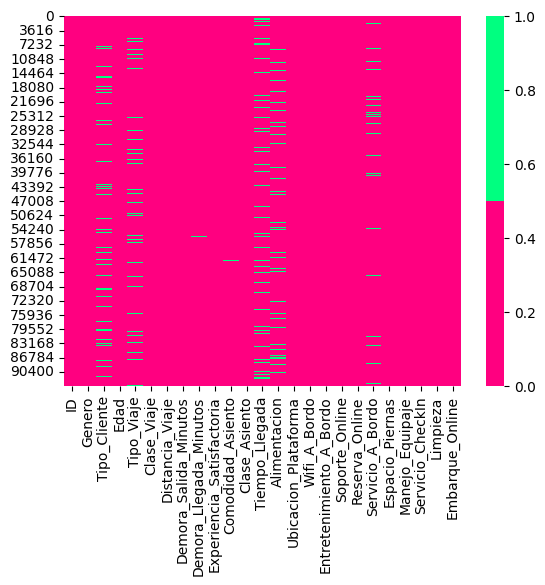

In [43]:
cols = Data.columns[:25]
colours = ['#ff0080', '#00ff80']
sns.heatmap(Data[cols].isnull(), cmap=sns.color_palette(colours))

ID - 0%
Genero - 0%
Tipo_Cliente - 9%
Edad - 0%
Tipo_Viaje - 10%
Clase_Viaje - 0%
Distancia_Viaje - 0%
Demora_Salida_Minutos - 0%
Demora_Llegada_Minutos - 0%
Experiencia_Satisfactoria - 0%
Comodidad_Asiento - 0%
Clase_Asiento - 0%
Tiempo_Llegada - 9%
Alimentacion - 9%
Ubicacion_Plataforma - 0%
Wifi_A_Bordo - 0%
Entretenimiento_A_Bordo - 0%
Soporte_Online - 0%
Reserva_Online - 0%
Servicio_A_Bordo - 8%
Espacio_Piernas - 0%
Manejo_Equipaje - 0%
Servicio_CheckIn - 0%
Limpieza - 0%
Embarque_Online - 0%


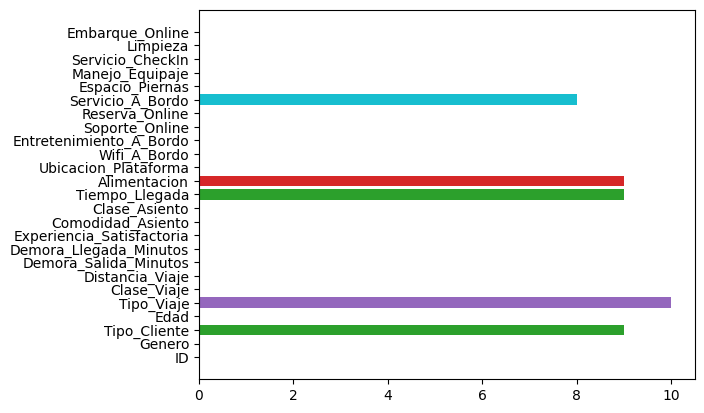

In [44]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    plt.barh(col, round(pct_missing*100))

I generate a histogram with the distribution of the missing values.

created missing indicator for: Genero
created missing indicator for: Tipo_Cliente
created missing indicator for: Edad
created missing indicator for: Tipo_Viaje
created missing indicator for: Demora_Salida_Minutos
created missing indicator for: Demora_Llegada_Minutos
created missing indicator for: Comodidad_Asiento
created missing indicator for: Tiempo_Llegada
created missing indicator for: Alimentacion
created missing indicator for: Ubicacion_Plataforma
created missing indicator for: Wifi_A_Bordo
created missing indicator for: Entretenimiento_A_Bordo
created missing indicator for: Soporte_Online
created missing indicator for: Reserva_Online
created missing indicator for: Servicio_A_Bordo
created missing indicator for: Espacio_Piernas
created missing indicator for: Manejo_Equipaje
created missing indicator for: Servicio_CheckIn
created missing indicator for: Limpieza
created missing indicator for: Embarque_Online


<Axes: xlabel='index'>

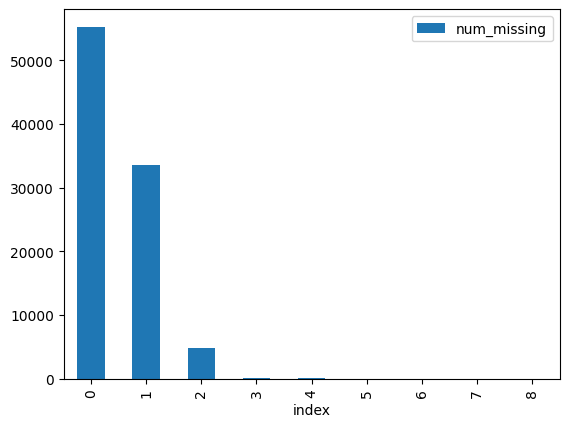

In [45]:
Data_missings=Data.copy()
for col in Data_missings.columns:
    missing = Data_missings[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        Data_missings['{}_ismissing'.format(col)] = missing


ismissing_cols = [col for col in Data_missings.columns if 'ismissing' in col]

Data_missings['num_missing'] = Data_missings[ismissing_cols].sum(axis=1)

Data_missings['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

I check the columns to see if they have many missing values.

Through this function I confirm that indeed no attribute of the consolidated dataset has more than 80% of missign values.

In [46]:
fs = FeatureSelector(data = Data, labels = Data.columns)
fs.identify_missing(missing_threshold=0.8)

0 features with greater than 0.80 missing values.



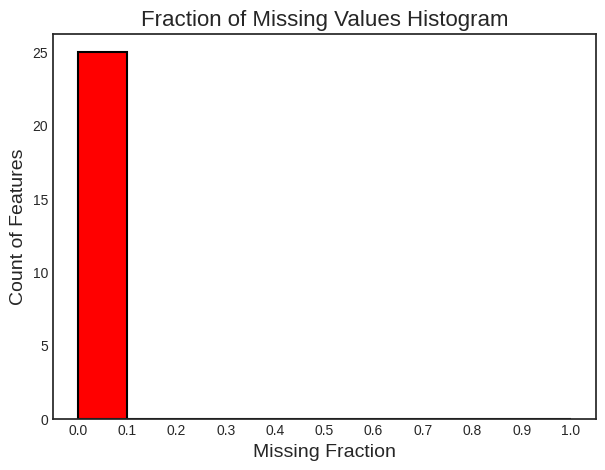

In [47]:
fs.plot_missing()

In [48]:
Data.isnull().mean()*100

ID                           0.000000
Genero                       0.081915
Tipo_Cliente                 9.491489
Edad                         0.034043
Tipo_Viaje                   9.786170
Clase_Viaje                  0.000000
Distancia_Viaje              0.000000
Demora_Salida_Minutos        0.060638
Demora_Llegada_Minutos       0.378723
Experiencia_Satisfactoria    0.000000
Comodidad_Asiento            0.064894
Clase_Asiento                0.000000
Tiempo_Llegada               9.463830
Alimentacion                 9.254255
Ubicacion_Plataforma         0.031915
Wifi_A_Bordo                 0.031915
Entretenimiento_A_Bordo      0.019149
Soporte_Online               0.096809
Reserva_Online               0.077660
Servicio_A_Bordo             8.064894
Espacio_Piernas              0.095745
Manejo_Equipaje              0.150000
Servicio_CheckIn             0.080851
Limpieza                     0.006383
Embarque_Online              0.006383
dtype: float64

In [49]:
Data.groupby(['Experiencia_Satisfactoria'])['Experiencia_Satisfactoria'].count()

Experiencia_Satisfactoria
0    42605
1    51395
Name: Experiencia_Satisfactoria, dtype: int64

<Axes: >

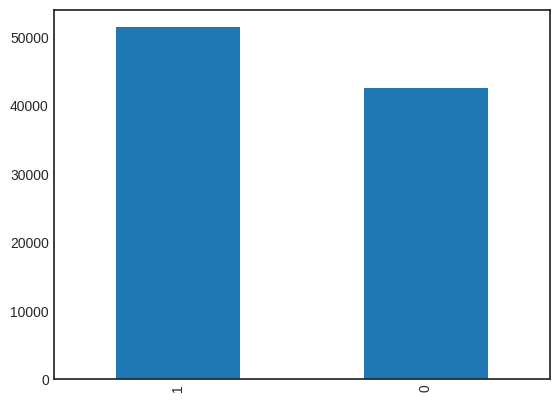

In [50]:
Data['Experiencia_Satisfactoria'].value_counts().plot.bar()

In [51]:
Data['Demora_Vuelo'] = (Data['Demora_Salida_Minutos'] > 0) | (Data['Demora_Llegada_Minutos'] > 0)
Data['Demora_Vuelo'] = Data['Demora_Vuelo'].astype(int)

In [52]:
Data['Tiempo_Demora'] = Data['Demora_Salida_Minutos'] + Data['Demora_Llegada_Minutos']

In [53]:
Data

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online,Demora_Vuelo,Tiempo_Demora
0,98800001,Femenino,Fidelizado,52.0,NaN,Business,272,0.0,5.0,0,Necesita Mejora,Plus,Excelente,Excelente,Muy Conveniente,Bien,Necesita Mejora,Aceptable,Necesita Mejora,Necesita Mejora,Aceptable,Necesita Mejora,Bien,Necesita Mejora,Pobre,1,5.0
1,98800002,Masculino,Fidelizado,48.0,Personal,Eco,2200,9.0,0.0,0,Pobre,Ordinario,Excelente,Pobre,Necesita Mejora,Bien,Pobre,Bien,Bien,Excelente,Necesita Mejora,Pobre,Necesita Mejora,Bien,Bien,1,9.0
2,98800003,Femenino,Fidelizado,43.0,Negocios,Business,1061,77.0,119.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Necesita Mejora,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Excelente,1,196.0
3,98800004,Femenino,Fidelizado,44.0,Negocios,Business,780,13.0,18.0,0,Aceptable,Ordinario,Necesita Mejora,NaN,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Aceptable,1,31.0
4,98800005,Femenino,Fidelizado,50.0,Negocios,Business,1981,0.0,0.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Necesita Mejora,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Bien,Bien,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,Femenino,No Leal,44.0,Negocios,Eco,1280,0.0,0.0,0,Pobre,Plus,Muy Pobre,Pobre,Manejable,Aceptable,Pobre,Aceptable,Aceptable,Necesita Mejora,Pobre,Bien,Pobre,Bien,Aceptable,0,0.0
93996,98893997,Masculino,Fidelizado,70.0,Personal,Eco,2352,0.0,0.0,0,Pobre,Plus,Bien,NaN,No Conveniente,Excelente,Muy Pobre,Excelente,Excelente,Aceptable,Bien,Aceptable,Aceptable,Excelente,Excelente,0,0.0
93997,98893998,Femenino,Fidelizado,43.0,Negocios,Business,5652,202.0,207.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Bien,Excelente,Excelente,Excelente,1,409.0
93998,98893999,Masculino,Fidelizado,44.0,Negocios,Business,1184,19.0,4.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Aceptable,Bien,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,1,23.0


I proceed to manage the existing missing values. I could eliminate them through the "Dropna" function but those records would be left out of the analysis for which I proceed to impute the null values ​​with the mean and the mode.

In [54]:
variables_numericas = Data.select_dtypes(include='number')
Data[variables_numericas.columns] = variables_numericas.fillna(variables_numericas.mean())

In [55]:
variables_categoricas = Data.select_dtypes(include='object')
Data[variables_categoricas.columns] = variables_categoricas.apply(lambda x: x.fillna(x.mode()[0]))

In [56]:
Data

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online,Demora_Vuelo,Tiempo_Demora
0,98800001,Femenino,Fidelizado,52.0,Negocios,Business,272,0.0,5.0,0,Necesita Mejora,Plus,Excelente,Excelente,Muy Conveniente,Bien,Necesita Mejora,Aceptable,Necesita Mejora,Necesita Mejora,Aceptable,Necesita Mejora,Bien,Necesita Mejora,Pobre,1,5.0
1,98800002,Masculino,Fidelizado,48.0,Personal,Eco,2200,9.0,0.0,0,Pobre,Ordinario,Excelente,Pobre,Necesita Mejora,Bien,Pobre,Bien,Bien,Excelente,Necesita Mejora,Pobre,Necesita Mejora,Bien,Bien,1,9.0
2,98800003,Femenino,Fidelizado,43.0,Negocios,Business,1061,77.0,119.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Necesita Mejora,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Excelente,1,196.0
3,98800004,Femenino,Fidelizado,44.0,Negocios,Business,780,13.0,18.0,0,Aceptable,Ordinario,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Aceptable,1,31.0
4,98800005,Femenino,Fidelizado,50.0,Negocios,Business,1981,0.0,0.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Necesita Mejora,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Bien,Bien,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,Femenino,No Leal,44.0,Negocios,Eco,1280,0.0,0.0,0,Pobre,Plus,Muy Pobre,Pobre,Manejable,Aceptable,Pobre,Aceptable,Aceptable,Necesita Mejora,Pobre,Bien,Pobre,Bien,Aceptable,0,0.0
93996,98893997,Masculino,Fidelizado,70.0,Personal,Eco,2352,0.0,0.0,0,Pobre,Plus,Bien,Aceptable,No Conveniente,Excelente,Muy Pobre,Excelente,Excelente,Aceptable,Bien,Aceptable,Aceptable,Excelente,Excelente,0,0.0
93997,98893998,Femenino,Fidelizado,43.0,Negocios,Business,5652,202.0,207.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Bien,Excelente,Excelente,Excelente,1,409.0
93998,98893999,Masculino,Fidelizado,44.0,Negocios,Business,1184,19.0,4.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Aceptable,Bien,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,1,23.0


I export the union of the data sets in an excel file, to save a backup copy of the consolidated data.

In [57]:
Data.to_excel('DataConsolidated.xlsx', index = False)

In [58]:
Data_ml = Data.copy()

# 4. Exploratory Data Analysis





At this point I perform an exploratory analysis of the data. Different graphs are generated that allow knowing the distribution of the data corresponding to the attributes that make up the dataset. These visualizations are produced using functions from previously imported libraries.


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Edad'),
  Text(2, 0, 'Distancia_Viaje'),
  Text(3, 0, 'Demora_Salida_Minutos'),
  Text(4, 0, 'Demora_Llegada_Minutos'),
  Text(5, 0, 'Experiencia_Satisfactoria'),
  Text(6, 0, 'Demora_Vuelo'),
  Text(7, 0, 'Tiempo_Demora')])

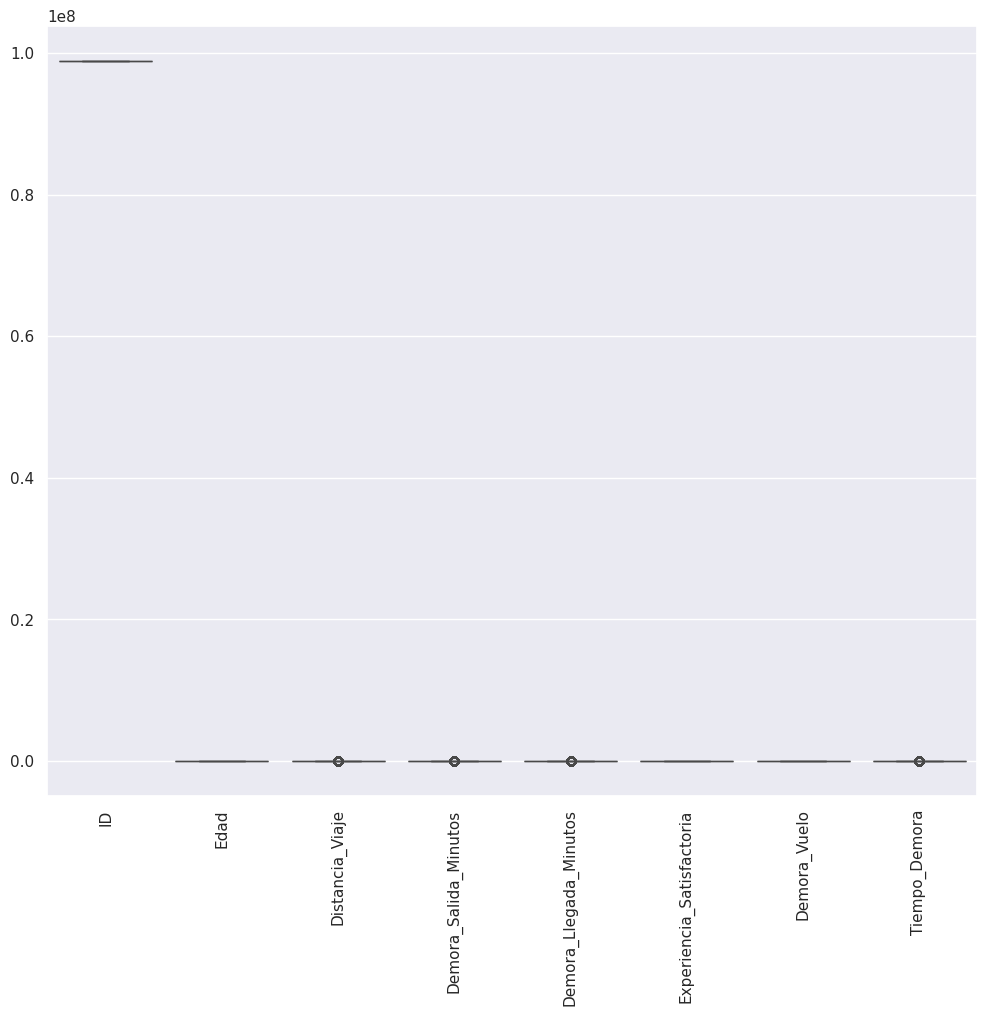

In [59]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(data=Data)
plt.xticks(rotation=90)

At this point, different graphs are generated that allow us to know the distribution of the data corresponding to the attributes that conform the dataset. These visualizations are produced using functions from previously imported libraries.

In [60]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94000 entries, 0 to 93999
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         94000 non-null  int64  
 1   Genero                     94000 non-null  object 
 2   Tipo_Cliente               94000 non-null  object 
 3   Edad                       94000 non-null  float64
 4   Tipo_Viaje                 94000 non-null  object 
 5   Clase_Viaje                94000 non-null  object 
 6   Distancia_Viaje            94000 non-null  int64  
 7   Demora_Salida_Minutos      94000 non-null  float64
 8   Demora_Llegada_Minutos     94000 non-null  float64
 9   Experiencia_Satisfactoria  94000 non-null  int64  
 10  Comodidad_Asiento          94000 non-null  object 
 11  Clase_Asiento              94000 non-null  object 
 12  Tiempo_Llegada             94000 non-null  object 
 13  Alimentacion               94000 non-null  obj

A descriptive analysis of the attributes that make up the dataset is performed. For numerical attributes, the main measures of centrality and dispersion are generated; While for categorical attributes a list of the values ​​present in the dataset is generated.

In [61]:
def estadisticos_cont(num):
    estadisticos = num.describe().T
    estadisticos['median'] = num.median()
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return(estadisticos)

In [62]:
estadisticos_cont(Data.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
ID,94000.0,9.884700e+07,98847000.5,27135.606989,98800001.0,98823500.75,98847000.5,98870500.25,98894000.0
Edad,94000.0,3.942045e+01,40.0,15.115422,7.0,27.00,40.0,51.00,85.0
Distancia_Viaje,94000.0,1.978776e+03,1923.0,1027.915161,50.0,1359.00,1923.0,2537.00,6951.0
Demora_Salida_Minutos,94000.0,1.464294e+01,0.0,38.096899,0.0,0.00,0.0,12.00,1592.0
Demora_Llegada_Minutos,94000.0,1.499824e+01,0.0,38.330060,0.0,0.00,0.0,13.00,1584.0
Experiencia_Satisfactoria,94000.0,5.467553e-01,1.0,0.497812,0.0,0.00,1.0,1.00,1.0
Demora_Vuelo,94000.0,5.412766e-01,1.0,0.498296,0.0,0.00,1.0,1.00,1.0
Tiempo_Demora,94000.0,2.956702e+01,2.0,75.544793,0.0,0.00,2.0,24.00,3176.0


In [63]:
def graficos_eda_categoricos(cat):

    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    ax = ax.flat

    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

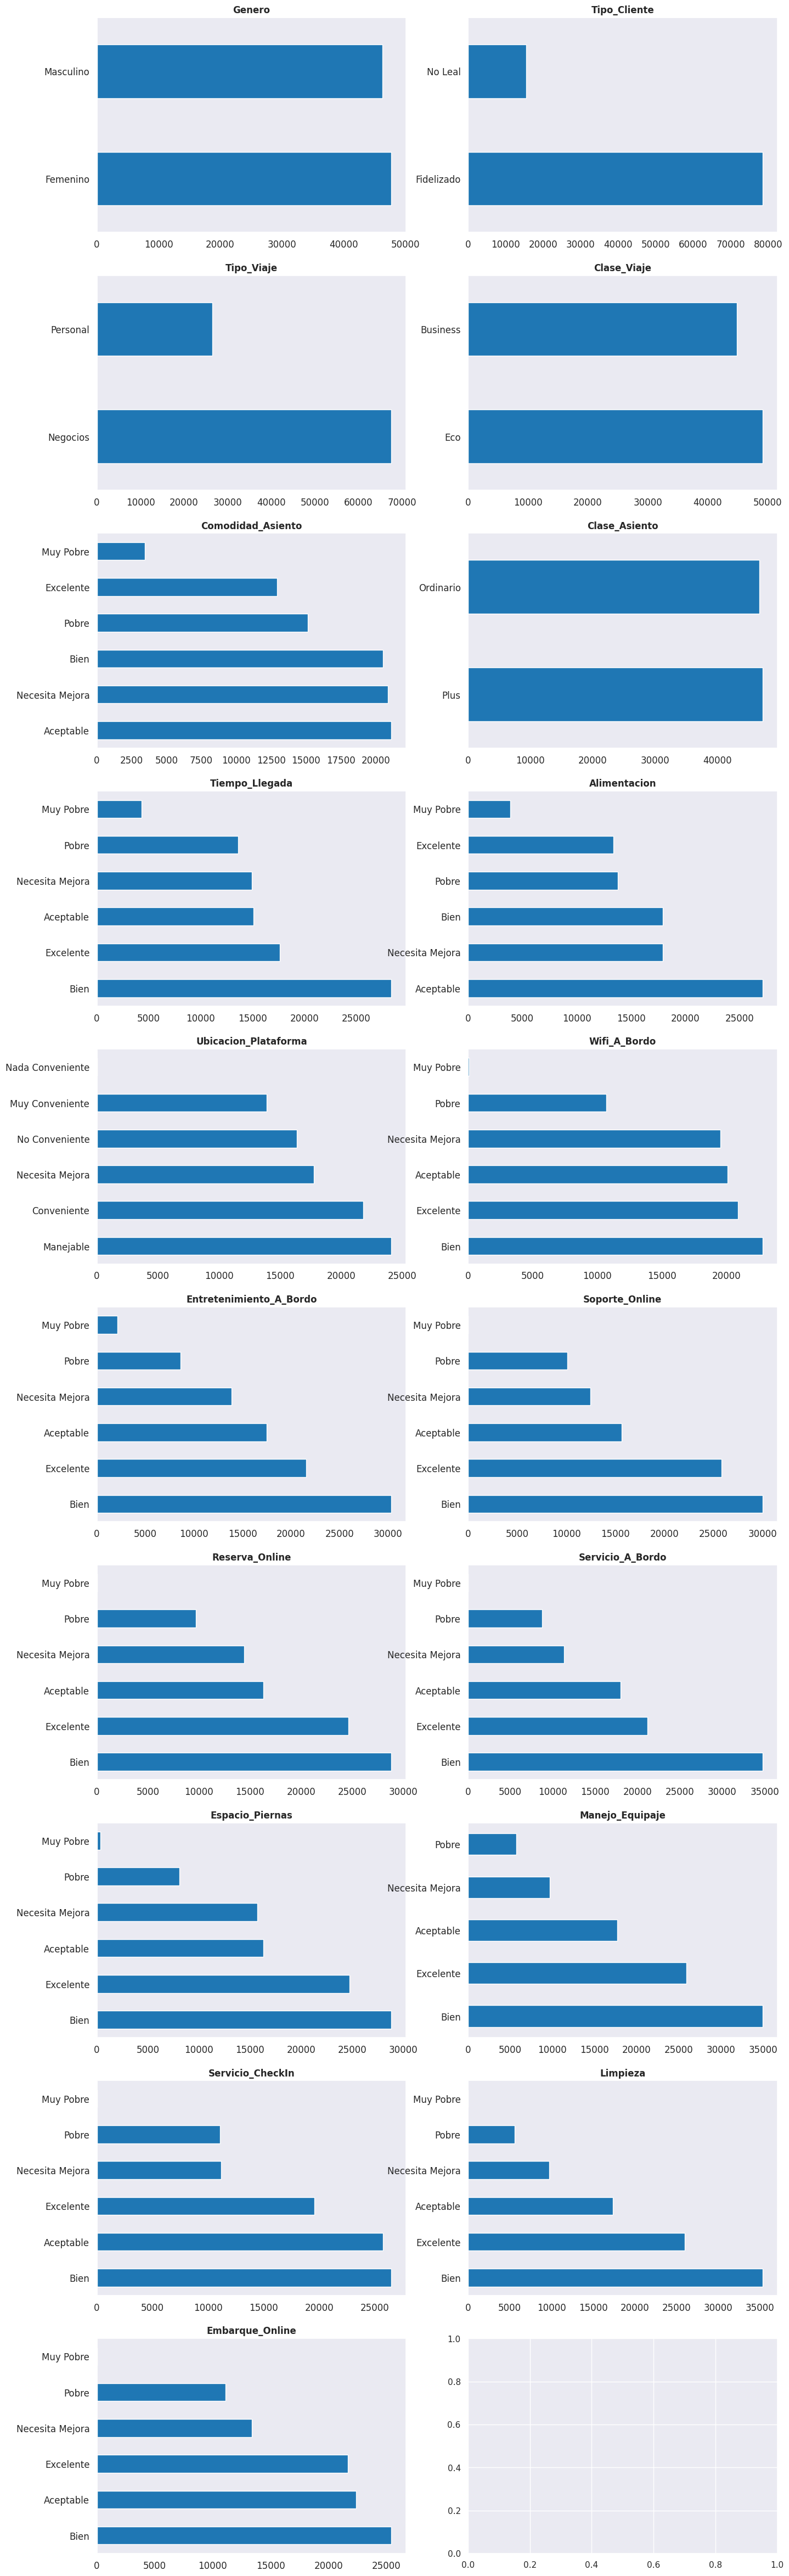

In [64]:
graficos_eda_categoricos(Data.select_dtypes('O'))

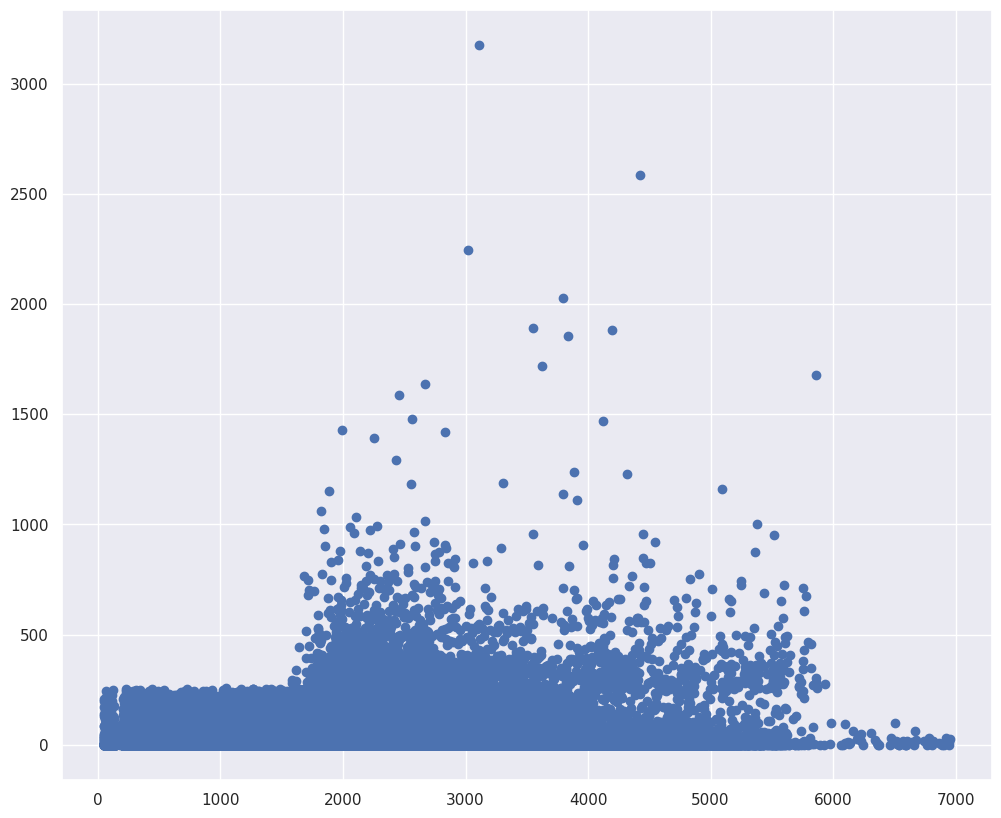

In [65]:
plt.scatter(Data['Distancia_Viaje'], Data['Tiempo_Demora'])
plt.show()

In [66]:
Data.Experiencia_Satisfactoria.value_counts(normalize = True) * 100

1    54.675532
0    45.324468
Name: Experiencia_Satisfactoria, dtype: float64

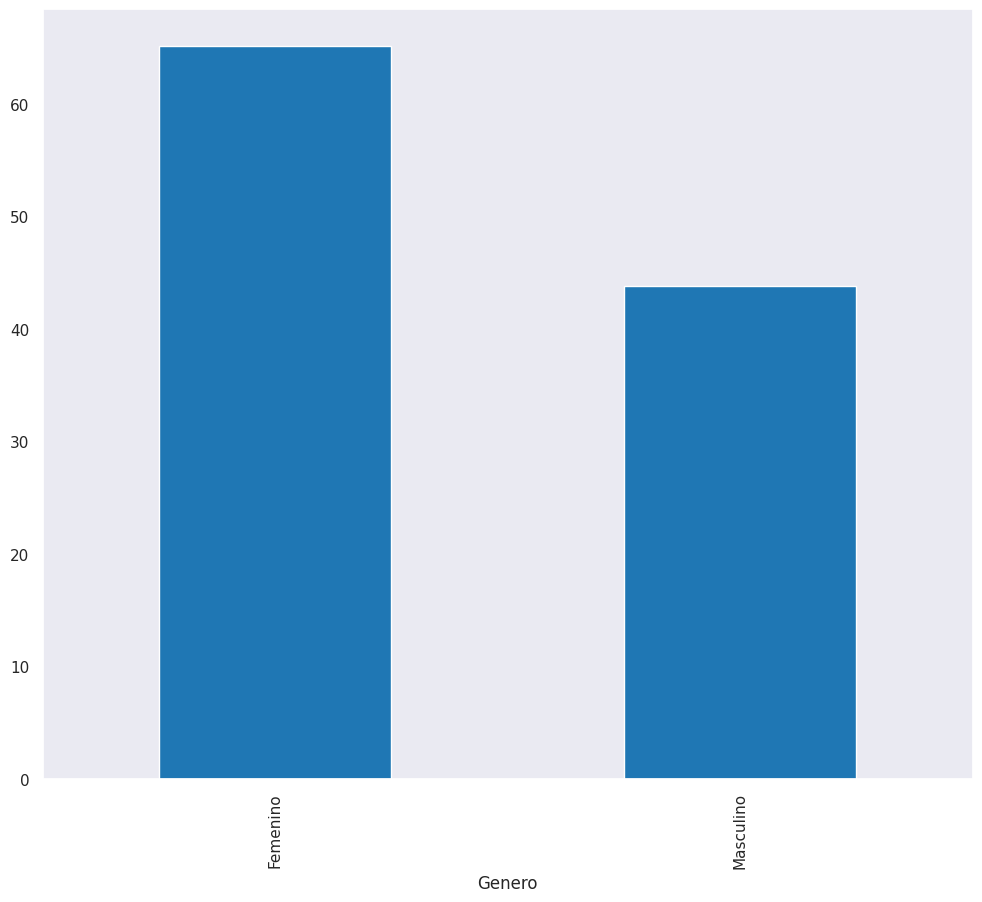

In [67]:
temp = Data.groupby('Genero').Experiencia_Satisfactoria.mean().sort_values(ascending = False) * 100
temp.plot.bar();

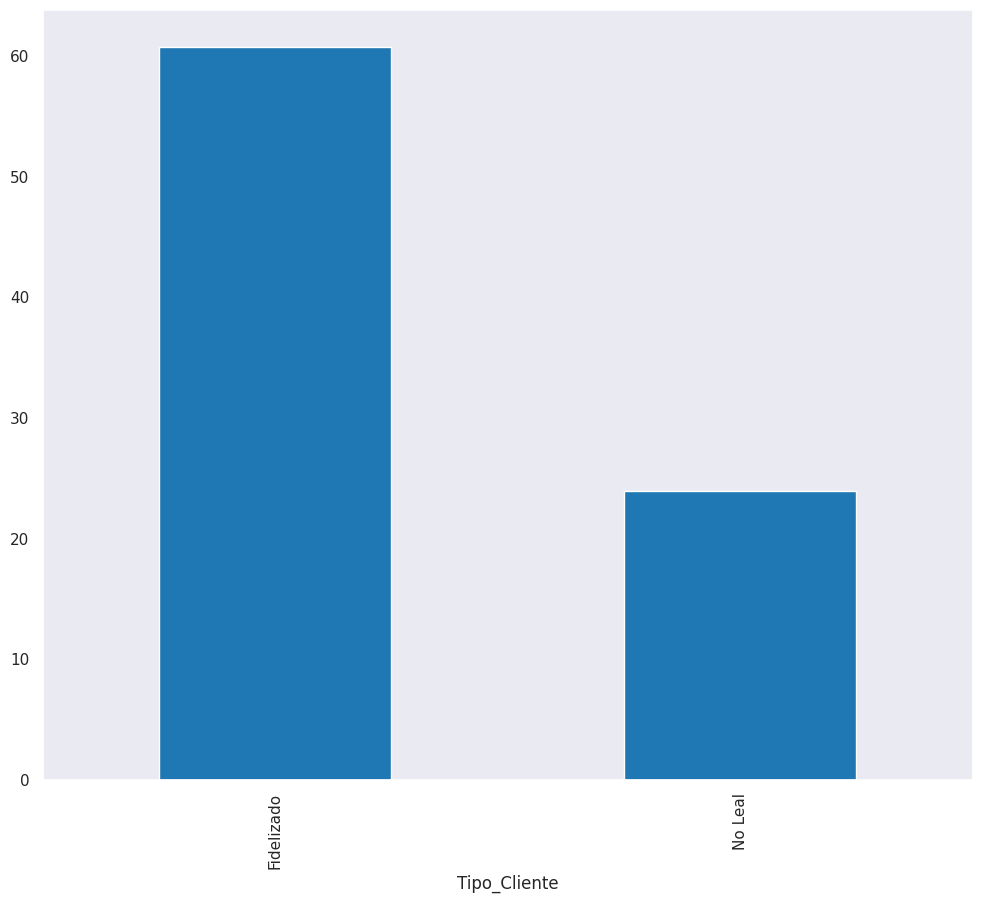

In [68]:
temp = Data.groupby('Tipo_Cliente').Experiencia_Satisfactoria.mean().sort_values(ascending = False) * 100
temp.plot.bar();

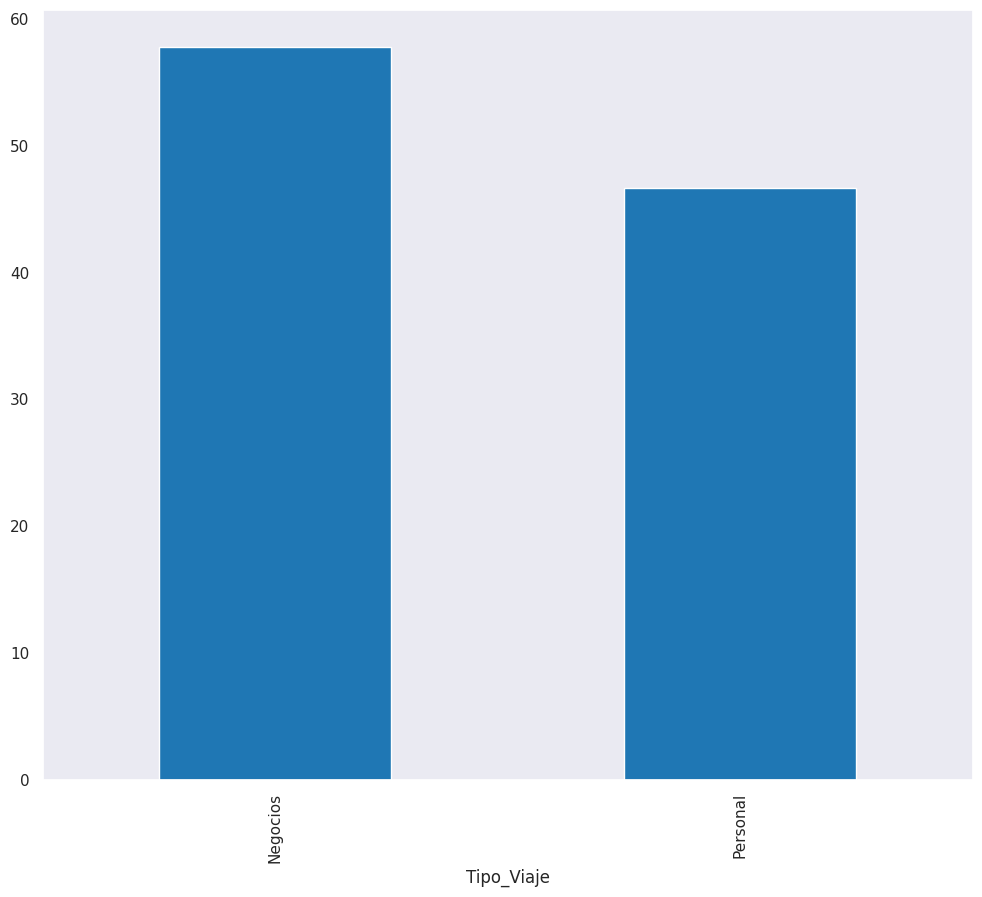

In [69]:
temp = Data.groupby('Tipo_Viaje').Experiencia_Satisfactoria.mean().sort_values(ascending = False) * 100
temp.plot.bar();

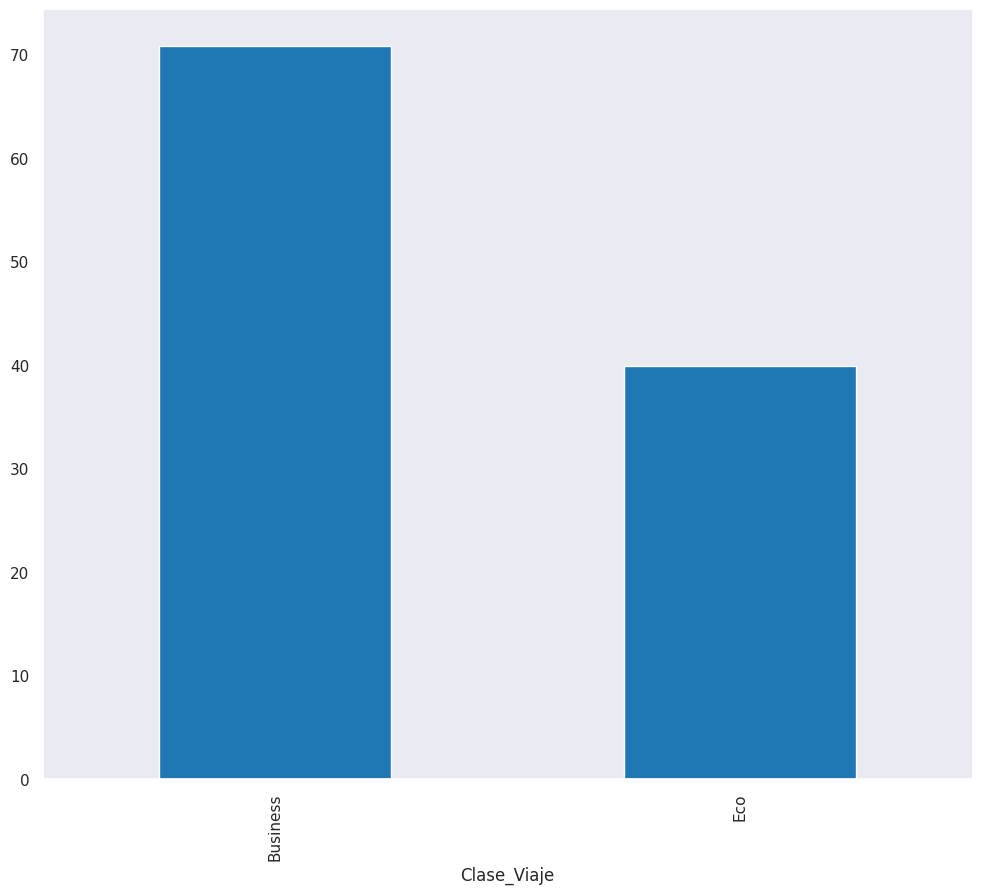

In [70]:
temp = Data.groupby('Clase_Viaje').Experiencia_Satisfactoria.mean().sort_values(ascending = False) * 100
temp.plot.bar();

<ipython-input-71-d7cd18e8bc7f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



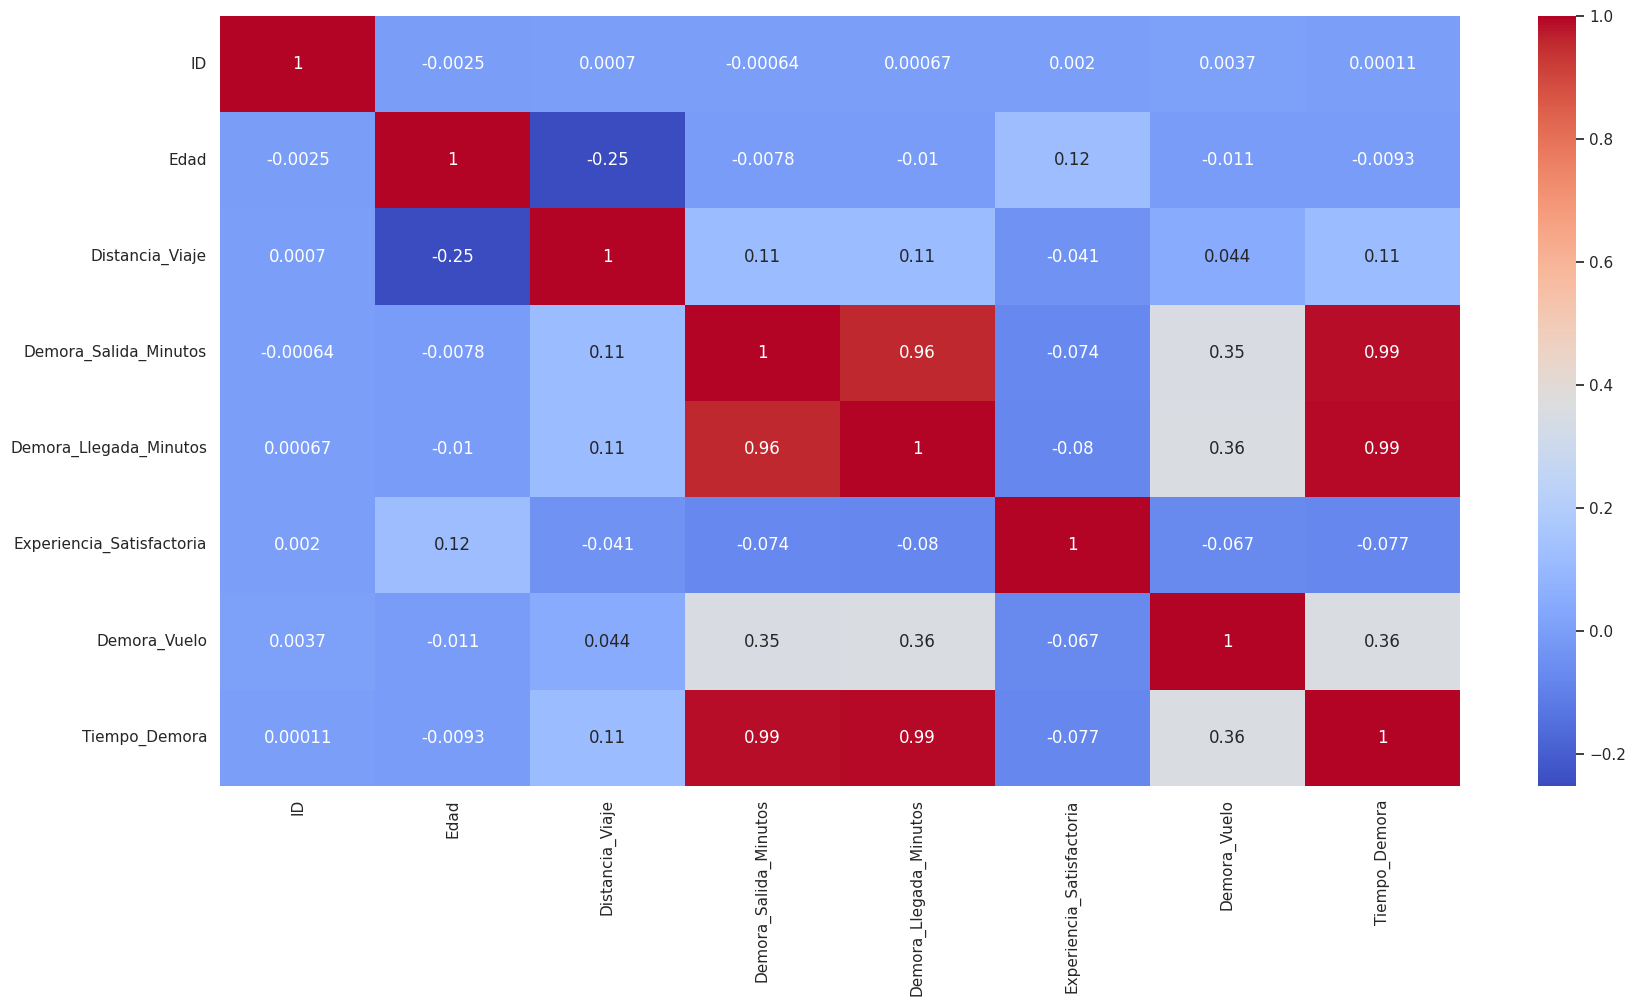

In [71]:
correlation_matrix = Data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


Perform value mapping to transform qualitative values ​​into quantitative values ​​following the corresponding scale.

In [72]:
calidad_servicios = {
    'Muy Pobre': 1,
    'Pobre': 2,
    'Necesita Mejora': 3,
    'Aceptable': 4,
    'Bien': 5,
    'Excelente': 6
}

Data['Alimentacion_Num'] = Data['Alimentacion'].map(calidad_servicios)
Data['Wifi_A_Bordo_Num'] = Data['Wifi_A_Bordo'].map(calidad_servicios)
Data['Entretenimiento_A_Bordo_Num'] = Data['Entretenimiento_A_Bordo'].map(calidad_servicios)
Data['Servicio_A_Bordo_Num'] = Data['Servicio_A_Bordo'].map(calidad_servicios)
Data['Comodidad_Asiento_Num'] = Data['Comodidad_Asiento'].map(calidad_servicios)
Data['Tiempo_Llegada_Num'] = Data['Tiempo_Llegada'].map(calidad_servicios)
Data['Limpieza_Num'] = Data['Limpieza'].map(calidad_servicios)
Data['Soporte_Online_Num'] = Data['Soporte_Online'].map(calidad_servicios)
Data['Reserva_Online_Num'] = Data['Reserva_Online'].map(calidad_servicios)
Data['Espacio_Piernas_Num'] = Data['Espacio_Piernas'].map(calidad_servicios)
Data['Manejo_Equipaje_Num'] = Data['Manejo_Equipaje'].map(calidad_servicios)
Data['Servicio_CheckIn_Num'] = Data['Servicio_CheckIn'].map(calidad_servicios)
Data['Embarque_Online_Num'] = Data['Embarque_Online'].map(calidad_servicios)

fidelizados = Data[Data['Tipo_Cliente'] == 'Fidelizado']
no_fidelizados = Data[Data['Tipo_Cliente'] == 'No Leal']


mean_fidelizados = fidelizados[['Alimentacion_Num', 'Wifi_A_Bordo_Num', 'Entretenimiento_A_Bordo_Num', 'Servicio_A_Bordo_Num', 'Limpieza_Num']].mean()
mean_no_fidelizados = no_fidelizados[['Alimentacion_Num', 'Wifi_A_Bordo_Num', 'Entretenimiento_A_Bordo_Num', 'Servicio_A_Bordo_Num', 'Limpieza_Num']].mean()
promedio_general_fidelizados = mean_fidelizados.mean()
promedio_general_no_fidelizados = mean_no_fidelizados.mean()


print("Calificaciones promedio de los clientes fidelizados:")
print(mean_fidelizados)
print("\nCalificaciones promedio de los clientes no fidelizados:")
print(mean_no_fidelizados)
print("\nPromedio general de calificaciones para clientes fidelizados:")
print(promedio_general_fidelizados)
print("\nPromedio general de calificaciones para clientes no fidelizados:")
print(promedio_general_no_fidelizados)

Calificaciones promedio de los clientes fidelizados:
Alimentacion_Num               3.890893
Wifi_A_Bordo_Num               4.289809
Entretenimiento_A_Bordo_Num    4.513377
Servicio_A_Bordo_Num           4.554789
Limpieza_Num                   4.705169
dtype: float64

Calificaciones promedio de los clientes no fidelizados:
Alimentacion_Num               3.744934
Wifi_A_Bordo_Num               4.038919
Entretenimiento_A_Bordo_Num    3.722290
Servicio_A_Bordo_Num           4.304986
Limpieza_Num                   4.699582
dtype: float64

Promedio general de calificaciones para clientes fidelizados:
4.390807469249888

Promedio general de calificaciones para clientes no fidelizados:
4.102142167899646


In [73]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94000 entries, 0 to 93999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           94000 non-null  int64  
 1   Genero                       94000 non-null  object 
 2   Tipo_Cliente                 94000 non-null  object 
 3   Edad                         94000 non-null  float64
 4   Tipo_Viaje                   94000 non-null  object 
 5   Clase_Viaje                  94000 non-null  object 
 6   Distancia_Viaje              94000 non-null  int64  
 7   Demora_Salida_Minutos        94000 non-null  float64
 8   Demora_Llegada_Minutos       94000 non-null  float64
 9   Experiencia_Satisfactoria    94000 non-null  int64  
 10  Comodidad_Asiento            94000 non-null  object 
 11  Clase_Asiento                94000 non-null  object 
 12  Tiempo_Llegada               94000 non-null  object 
 13  Alimentacion    

In [74]:
Data

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online,Demora_Vuelo,Tiempo_Demora,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num
0,98800001,Femenino,Fidelizado,52.0,Negocios,Business,272,0.0,5.0,0,Necesita Mejora,Plus,Excelente,Excelente,Muy Conveniente,Bien,Necesita Mejora,Aceptable,Necesita Mejora,Necesita Mejora,Aceptable,Necesita Mejora,Bien,Necesita Mejora,Pobre,1,5.0,6,5,3,3,3,6,3,4,3,4,3,5,2
1,98800002,Masculino,Fidelizado,48.0,Personal,Eco,2200,9.0,0.0,0,Pobre,Ordinario,Excelente,Pobre,Necesita Mejora,Bien,Pobre,Bien,Bien,Excelente,Necesita Mejora,Pobre,Necesita Mejora,Bien,Bien,1,9.0,2,5,2,6,2,6,5,5,5,3,2,3,5
2,98800003,Femenino,Fidelizado,43.0,Negocios,Business,1061,77.0,119.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Necesita Mejora,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Excelente,1,196.0,3,3,5,6,3,3,6,6,6,6,6,5,6
3,98800004,Femenino,Fidelizado,44.0,Negocios,Business,780,13.0,18.0,0,Aceptable,Ordinario,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Necesita Mejora,Aceptable,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Aceptable,1,31.0,4,4,3,4,4,3,4,4,4,4,4,5,4
4,98800005,Femenino,Fidelizado,50.0,Negocios,Business,1981,0.0,0.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Necesita Mejora,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Bien,Bien,0,0.0,4,3,5,5,4,4,5,6,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,Femenino,No Leal,44.0,Negocios,Eco,1280,0.0,0.0,0,Pobre,Plus,Muy Pobre,Pobre,Manejable,Aceptable,Pobre,Aceptable,Aceptable,Necesita Mejora,Pobre,Bien,Pobre,Bien,Aceptable,0,0.0,2,4,2,3,2,1,5,4,4,2,5,2,4
93996,98893997,Masculino,Fidelizado,70.0,Personal,Eco,2352,0.0,0.0,0,Pobre,Plus,Bien,Aceptable,No Conveniente,Excelente,Muy Pobre,Excelente,Excelente,Aceptable,Bien,Aceptable,Aceptable,Excelente,Excelente,0,0.0,4,6,1,4,2,5,6,6,6,5,4,4,6
93997,98893998,Femenino,Fidelizado,43.0,Negocios,Business,5652,202.0,207.0,1,Aceptable,Ordinario,Aceptable,Aceptable,Manejable,Excelente,Excelente,Excelente,Excelente,Bien,Excelente,Bien,Excelente,Excelente,Excelente,1,409.0,4,6,6,5,4,4,6,6,6,6,5,6,6
93998,98893999,Masculino,Fidelizado,44.0,Negocios,Business,1184,19.0,4.0,1,Necesita Mejora,Plus,Necesita Mejora,Necesita Mejora,Necesita Mejora,Aceptable,Bien,Bien,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,1,23.0,3,4,5,6,3,3,6,5,6,6,6,6,6


<ipython-input-75-d7cd18e8bc7f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



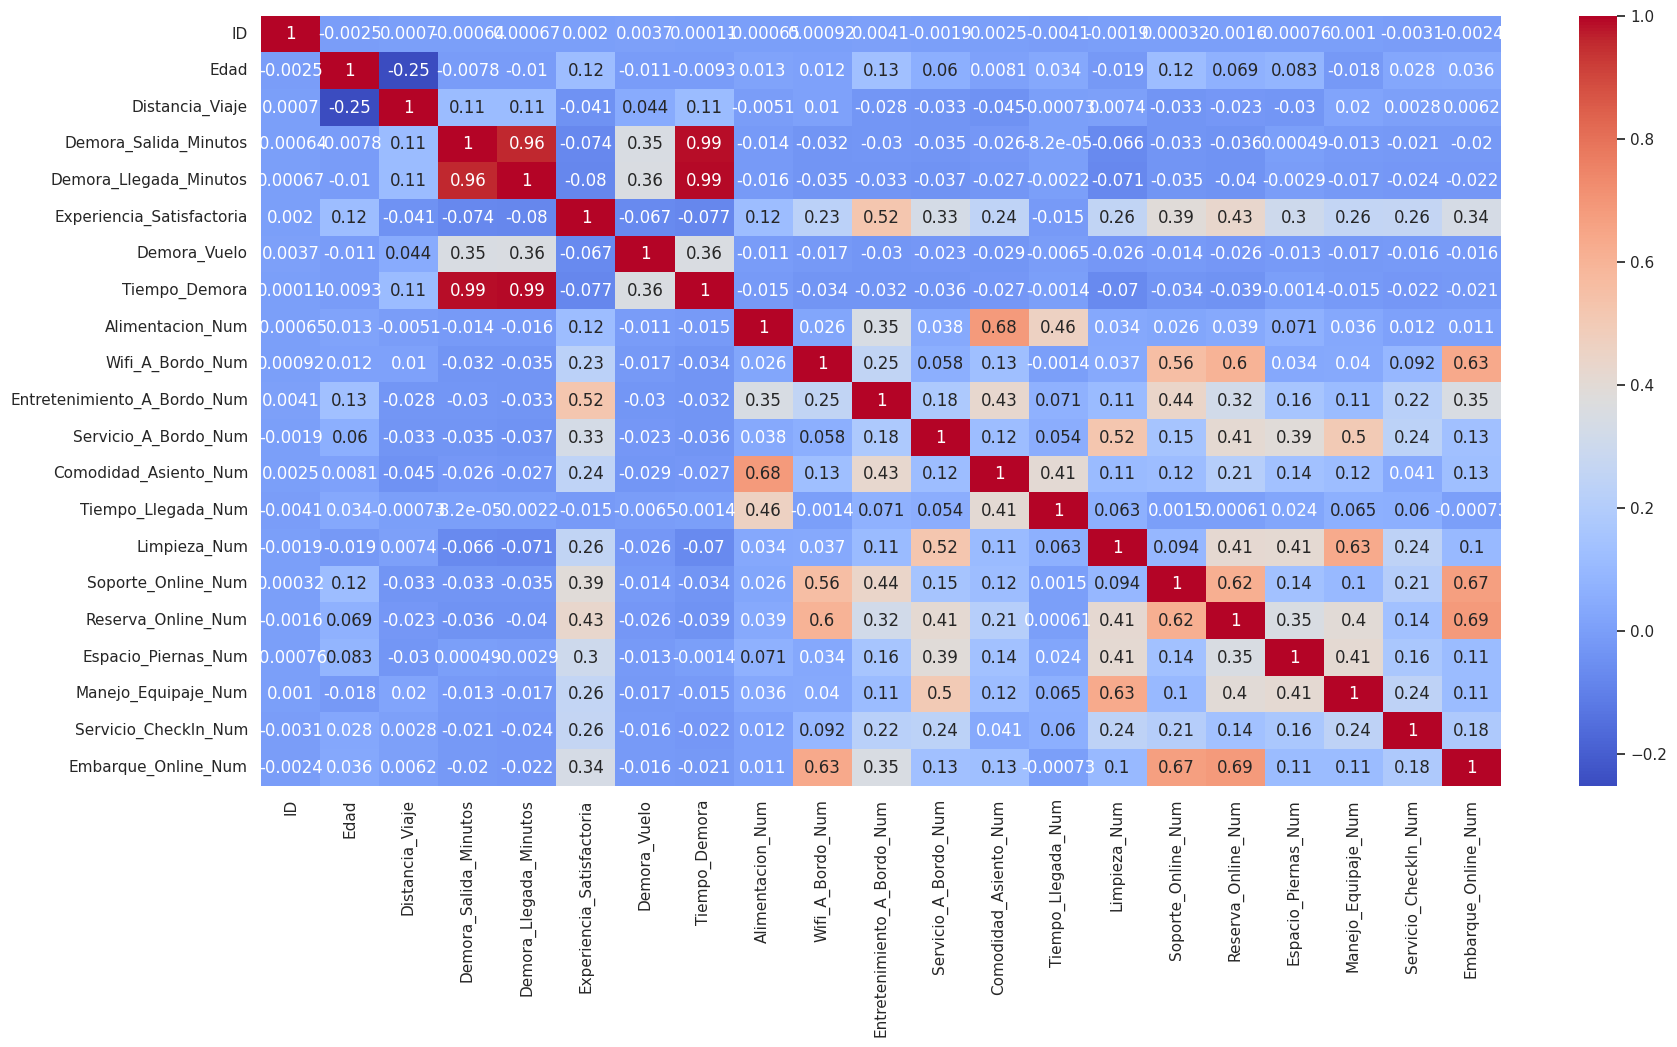

In [75]:
correlation_matrix = Data.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Through this graph, the correlation between the attributes of the dataset with the target attribute was validated, in this case with the "Experiencia_Satisfactoria" attribute.

<ipython-input-76-bdf28b9d4e9c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Text(0.5, 1.0, 'Variables Correlation')

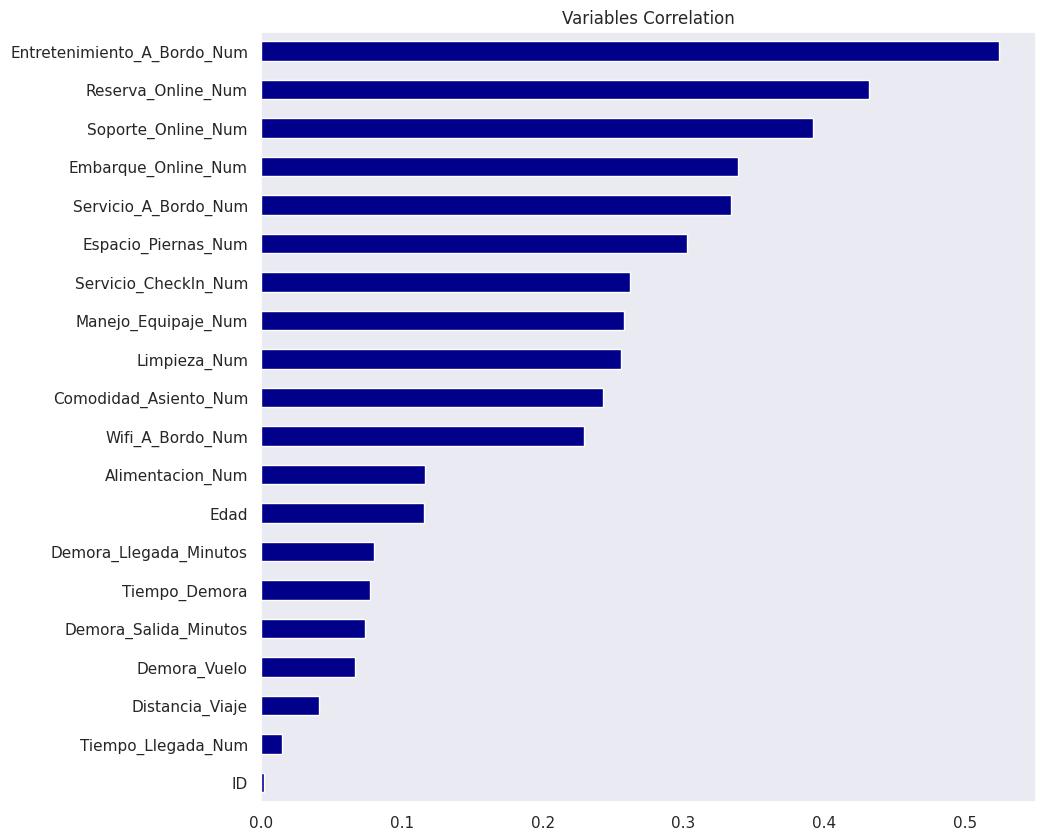

In [76]:
Data.corr().abs().Experiencia_Satisfactoria.drop('Experiencia_Satisfactoria').sort_values().plot.barh(color='darkblue',figsize=(10,10))
plt.title('Variables Correlation')

## Feature importance

In [77]:
Data = pd.get_dummies(Data, columns=[ 'Genero', 'Tipo_Cliente', 'Tipo_Viaje',  'Clase_Viaje'])

In [78]:
Data_num = Data.select_dtypes(include=[np.number])

In [79]:
Data_num

,ID,Edad,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Demora_Vuelo,Tiempo_Demora,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num,Genero_Femenino,Genero_Masculino,Tipo_Cliente_Fidelizado,Tipo_Cliente_No Leal,Tipo_Viaje_Negocios,Tipo_Viaje_Personal,Clase_Viaje_Business,Clase_Viaje_Eco
0,98800001,52.0,272,0.0,5.0,0,1,5.0,6,5,3,3,3,6,3,4,3,4,3,5,2,1,0,1,0,1,0,1,0
1,98800002,48.0,2200,9.0,0.0,0,1,9.0,2,5,2,6,2,6,5,5,5,3,2,3,5,0,1,1,0,0,1,0,1
2,98800003,43.0,1061,77.0,119.0,1,1,196.0,3,3,5,6,3,3,6,6,6,6,6,5,6,1,0,1,0,1,0,1,0
3,98800004,44.0,780,13.0,18.0,0,1,31.0,4,4,3,4,4,3,4,4,4,4,4,5,4,1,0,1,0,1,0,1,0
4,98800005,50.0,1981,0.0,0.0,1,0,0.0,4,3,5,5,4,4,5,6,5,5,5,5,5,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,44.0,1280,0.0,0.0,0,0,0.0,2,4,2,3,2,1,5,4,4,2,5,2,4,1,0,0,1,1,0,0,1
93996,98893997,70.0,2352,0.0,0.0,0,0,0.0,4,6,1,4,2,5,6,6,6,5,4,4,6,0,1,1,0,0,1,0,1
93997,98893998,43.0,5652,202.0,207.0,1,1,409.0,4,6,6,5,4,4,6,6,6,6,5,6,6,1,0,1,0,1,0,1,0
93998,98893999,44.0,1184,19.0,4.0,1,1,23.0,3,4,5,6,3,3,6,5,6,6,6,6,6,0,1,1,0,1,0,1,0


In [80]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
for column in Data_num.columns:
    if Data_num[column].dtype == 'object':
        Data_num[column] = label_encoder.fit_transform(Data_num[column])


X = Data_num.drop('Experiencia_Satisfactoria', axis=1)
y = Data_num['Experiencia_Satisfactoria']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


importancias = model.feature_importances_

caracteristicas_df = pd.DataFrame({'caracteristica': X.columns, 'importancia': importancias})
caracteristicas_df = caracteristicas_df.sort_values(by='importancia', ascending=False)

print(caracteristicas_df.head(3))


                 caracteristica  importancia
9   Entretenimiento_A_Bordo_Num     0.205411
11        Comodidad_Asiento_Num     0.126368
15           Reserva_Online_Num     0.082500


I export the union of the datasets in an excel file, to save a backup copy of the processed data.

In [81]:
Data.to_excel('DataProcessed.xlsx', index = False)

# 5. Cluster Data

In [82]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

features = ['Entretenimiento_A_Bordo_Num', 'Soporte_Online_Num', 'Reserva_Online_Num']
X = Data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [83]:
x_final = pd.DataFrame(data= X_scaled, columns=['Entretenimiento_A_Bordo_Num', 'Soporte_Online_Num', 'Reserva_Online_Num'])

In [84]:
x_final

,Entretenimiento_A_Bordo_Num,Soporte_Online_Num,Reserva_Online_Num
0,-1.026861,-0.397421,-1.126670
1,-1.769589,0.367304,0.405726
2,0.458595,1.132029,1.171925
3,-1.026861,-0.397421,-0.360472
4,0.458595,1.132029,0.405726
...,...,...,...
93995,-1.769589,-0.397421,-0.360472
93996,-2.512318,1.132029,1.171925
93997,1.201323,1.132029,1.171925
93998,0.458595,0.367304,1.171925


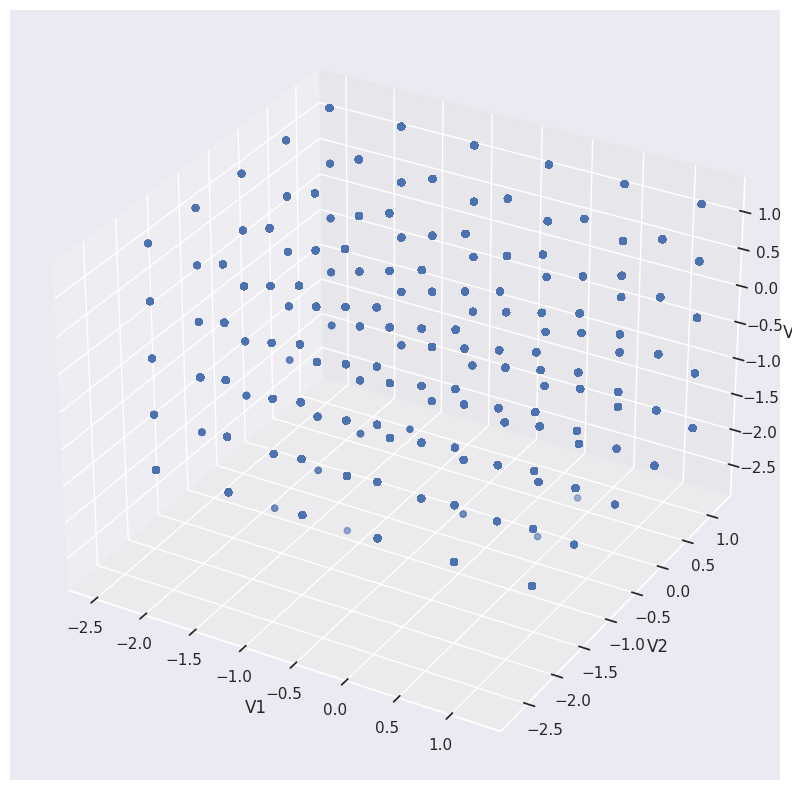

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_final['Entretenimiento_A_Bordo_Num'], x_final['Soporte_Online_Num'], x_final['Reserva_Online_Num'])
ax.set_xlabel('V1')
ax.set_ylabel('V2')
ax.set_zlabel('V3')
plt.show()

## PCA

To reduce the dimensionality of the dataset, I performed principal component analysis (PCA) before performing the clustering.

In [86]:
pca = PCA()
pca.fit(Data_num)
pca_2 = pca.transform(Data_num)

I generate the corresponding visualization to see the appropriate number of components to work with

Text(0.5, 1.0, 'PCA')

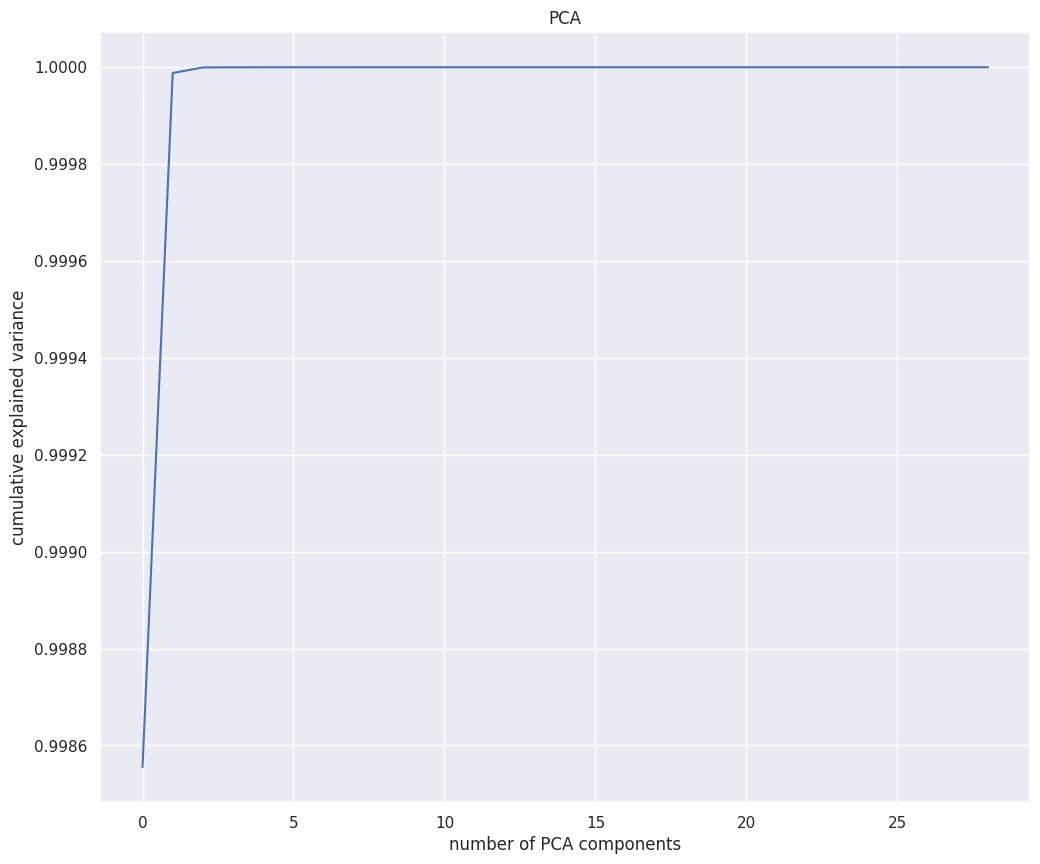

In [87]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of PCA components')
plt.ylabel('cumulative explained variance');
plt.title('PCA')

As a result of the component analysis (PCA), it is defined to use 3 components that represent the consolidated data set.

Next I scale the data to perform PCA with 3 components.

In [88]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(Data_num)
data_scaled

array([[-1.73203238,  0.83223713, -1.66043405, ..., -0.62548563,
         1.04684055, -1.04684055],
       [-1.73199553,  0.56760533,  0.2152171 , ...,  1.59875775,
        -0.95525531,  0.95525531],
       [-1.73195868,  0.23681558, -0.89285689, ..., -0.62548563,
         1.04684055, -1.04684055],
       ...,
       [ 1.73195868,  0.23681558,  3.57348877, ..., -0.62548563,
         1.04684055, -1.04684055],
       [ 1.73199553,  0.30297353, -0.77319658, ..., -0.62548563,
         1.04684055, -1.04684055],
       [ 1.73203238,  1.95692228, -0.04258765, ...,  1.59875775,
        -0.95525531,  0.95525531]])

In [89]:
pca = PCA(n_components=3)
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)
df_pca = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2', 'PC3'])

In [90]:
df_pca

,PC1,PC2,PC3
0,1.429315,0.474757,-1.072926
1,1.809647,-2.108308,1.314020
2,-2.564916,3.416476,2.566144
3,0.589545,1.084073,-0.698047
4,-2.275303,0.369245,-1.124109
...,...,...,...
93995,3.254213,0.236831,-2.374503
93996,0.120151,-2.630296,1.107625
93997,-2.590421,6.913986,6.288367
93998,-2.817977,1.026954,-0.316636


I generate the visualization of the 3 defined components in a 3D graph

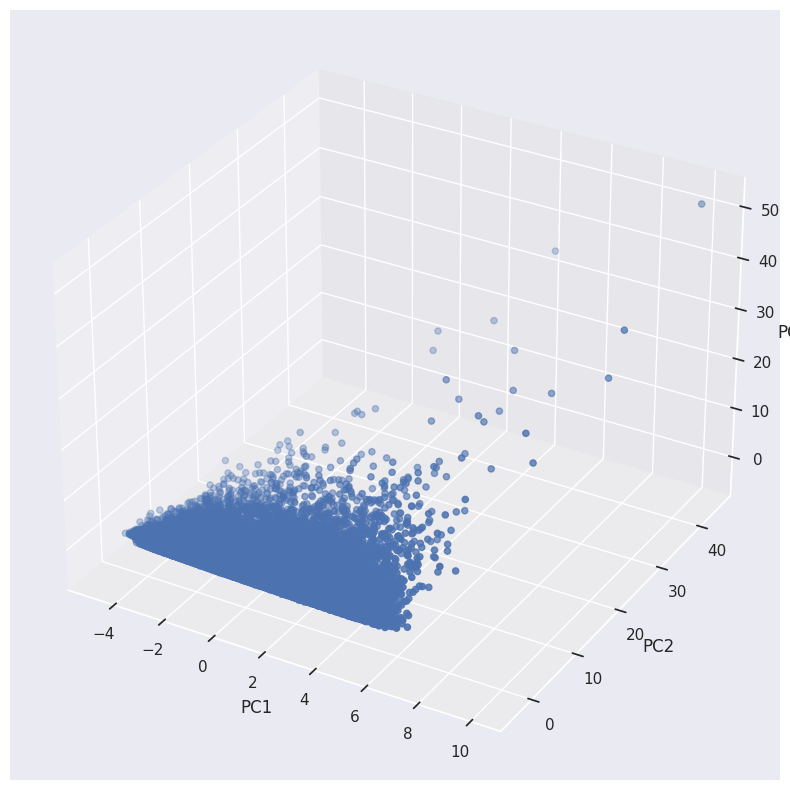

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


## K-Means

I import the libraries and modules required to work with the data.

In [92]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

I cluster the data using the K-means algorithm.

In [93]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_pca)
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['K_Cluster'] = kmeans.labels_
K_cluster_labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



I display the result obtained with the assigned parameters.

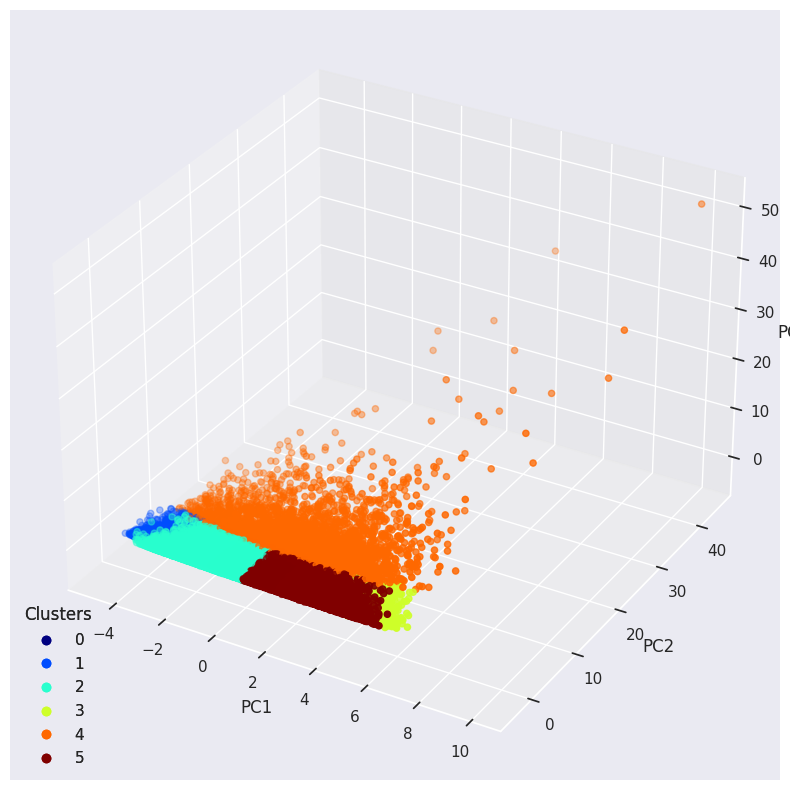

In [94]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['K_Cluster'], cmap="jet")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
plt.show()


The result obtained is not bad but it must be taken into account that the K-means algorithm is designed to work with the Euclidean distance, it does not deal well with data with a high covariance in the data.

To establish which clustering algorithm generated the best results, I use the Silhouette metric to compare quantitatively.

In [95]:
silhouette_avg = silhouette_score(df_pca, K_cluster_labels)
print("El coeficiente de silueta promedio es :", silhouette_avg)

El coeficiente de silueta promedio es : 0.47096366397258593


## DBSCAN

I import the libraries and modules required to work with the data.

In [96]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

I cluster the data using the DBSCAN algorithm

In [97]:
dbscan = DBSCAN (eps= 1.0162, min_samples= 5)
dbscan.fit(df_pca[['PC1', 'PC2', 'PC3']])
df_pca['D_Cluster'] = dbscan.labels_
D_cluster_labels = dbscan.labels_

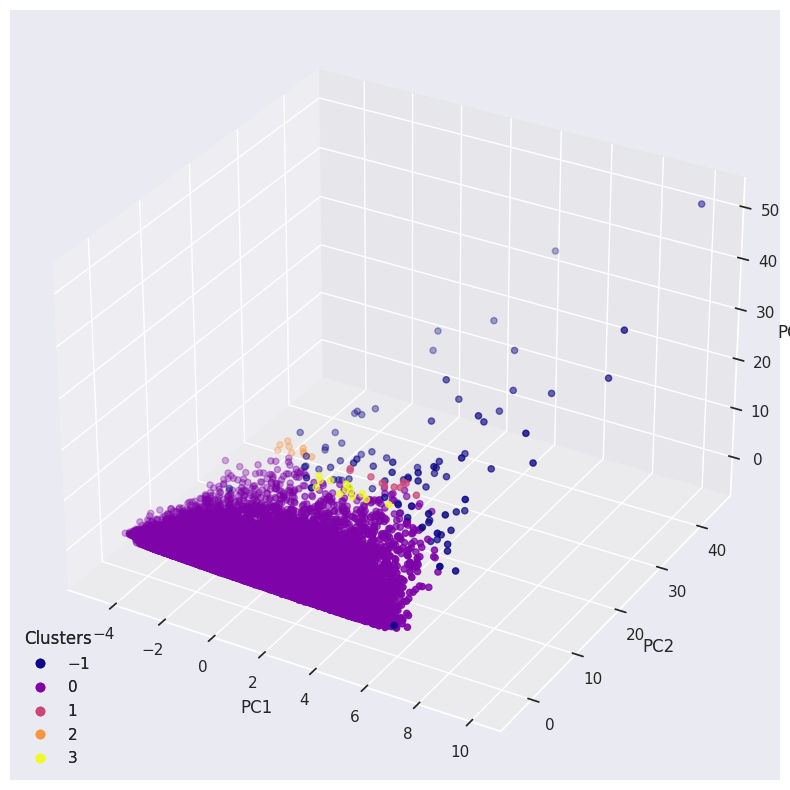

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['D_Cluster'], cmap="plasma")
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Clusters")
ax.add_artist(legend1)
plt.show()


To establish which clustering algorithm generated the best results, I use the Silhouette metric to compare quantitatively.

In [99]:
silhouette_avg = silhouette_score(df_pca, D_cluster_labels)
print("El coeficiente de silueta promedio es :", silhouette_avg)

El coeficiente de silueta promedio es : 0.7065198037302011


# 6. Integrate Target into Dataset

I integrate the best clustering result as an attribute in the dataset.

In [100]:
Data_clustered = pd.concat([Data_num, pd.Series(K_cluster_labels, name='Cluster')], axis=1)
print(Data_clustered.head())

         ID  Edad  Distancia_Viaje  Demora_Salida_Minutos  \
0  98800001  52.0              272                    0.0   
1  98800002  48.0             2200                    9.0   
2  98800003  43.0             1061                   77.0   
3  98800004  44.0              780                   13.0   
4  98800005  50.0             1981                    0.0   

   Demora_Llegada_Minutos  Experiencia_Satisfactoria  Demora_Vuelo  \
0                     5.0                          0             1   
1                     0.0                          0             1   
2                   119.0                          1             1   
3                    18.0                          0             1   
4                     0.0                          1             0   

   Tiempo_Demora  Alimentacion_Num  Wifi_A_Bordo_Num  \
0            5.0                 6                 5   
1            9.0                 2                 5   
2          196.0                 3          

In [101]:
Data_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94000 entries, 0 to 93999
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           94000 non-null  int64  
 1   Edad                         94000 non-null  float64
 2   Distancia_Viaje              94000 non-null  int64  
 3   Demora_Salida_Minutos        94000 non-null  float64
 4   Demora_Llegada_Minutos       94000 non-null  float64
 5   Experiencia_Satisfactoria    94000 non-null  int64  
 6   Demora_Vuelo                 94000 non-null  int64  
 7   Tiempo_Demora                94000 non-null  float64
 8   Alimentacion_Num             94000 non-null  int64  
 9   Wifi_A_Bordo_Num             94000 non-null  int64  
 10  Entretenimiento_A_Bordo_Num  94000 non-null  int64  
 11  Servicio_A_Bordo_Num         94000 non-null  int64  
 12  Comodidad_Asiento_Num        94000 non-null  int64  
 13  Tiempo_Llegada_N

In [102]:
Data_clustered.isnull().mean()*100

ID                             0.0
Edad                           0.0
Distancia_Viaje                0.0
Demora_Salida_Minutos          0.0
Demora_Llegada_Minutos         0.0
Experiencia_Satisfactoria      0.0
Demora_Vuelo                   0.0
Tiempo_Demora                  0.0
Alimentacion_Num               0.0
Wifi_A_Bordo_Num               0.0
Entretenimiento_A_Bordo_Num    0.0
Servicio_A_Bordo_Num           0.0
Comodidad_Asiento_Num          0.0
Tiempo_Llegada_Num             0.0
Limpieza_Num                   0.0
Soporte_Online_Num             0.0
Reserva_Online_Num             0.0
Espacio_Piernas_Num            0.0
Manejo_Equipaje_Num            0.0
Servicio_CheckIn_Num           0.0
Embarque_Online_Num            0.0
Genero_Femenino                0.0
Genero_Masculino               0.0
Tipo_Cliente_Fidelizado        0.0
Tipo_Cliente_No Leal           0.0
Tipo_Viaje_Negocios            0.0
Tipo_Viaje_Personal            0.0
Clase_Viaje_Business           0.0
Clase_Viaje_Eco     

The 'Clusters' attribute must be as a numeric type attribute.

In [103]:
Data_clustered['Cluster']= Data_clustered['Cluster'].astype(int)
Data_clustered

,ID,Edad,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Demora_Vuelo,Tiempo_Demora,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num,Genero_Femenino,Genero_Masculino,Tipo_Cliente_Fidelizado,Tipo_Cliente_No Leal,Tipo_Viaje_Negocios,Tipo_Viaje_Personal,Clase_Viaje_Business,Clase_Viaje_Eco,Cluster
0,98800001,52.0,272,0.0,5.0,0,1,5.0,6,5,3,3,3,6,3,4,3,4,3,5,2,1,0,1,0,1,0,1,0,0
1,98800002,48.0,2200,9.0,0.0,0,1,9.0,2,5,2,6,2,6,5,5,5,3,2,3,5,0,1,1,0,0,1,0,1,5
2,98800003,43.0,1061,77.0,119.0,1,1,196.0,3,3,5,6,3,3,6,6,6,6,6,5,6,1,0,1,0,1,0,1,0,1
3,98800004,44.0,780,13.0,18.0,0,1,31.0,4,4,3,4,4,3,4,4,4,4,4,5,4,1,0,1,0,1,0,1,0,0
4,98800005,50.0,1981,0.0,0.0,1,0,0.0,4,3,5,5,4,4,5,6,5,5,5,5,5,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,44.0,1280,0.0,0.0,0,0,0.0,2,4,2,3,2,1,5,4,4,2,5,2,4,1,0,0,1,1,0,0,1,3
93996,98893997,70.0,2352,0.0,0.0,0,0,0.0,4,6,1,4,2,5,6,6,6,5,4,4,6,0,1,1,0,0,1,0,1,2
93997,98893998,43.0,5652,202.0,207.0,1,1,409.0,4,6,6,5,4,4,6,6,6,6,5,6,6,1,0,1,0,1,0,1,0,4
93998,98893999,44.0,1184,19.0,4.0,1,1,23.0,3,4,5,6,3,3,6,5,6,6,6,6,6,0,1,1,0,1,0,1,0,1


Through this graph, the correlation between the attributes of the dataset with the target attribute was validated, in this case with the "Experiencia_Satisfactoria" attribute.

Text(0.5, 1.0, 'Variables Correlation')

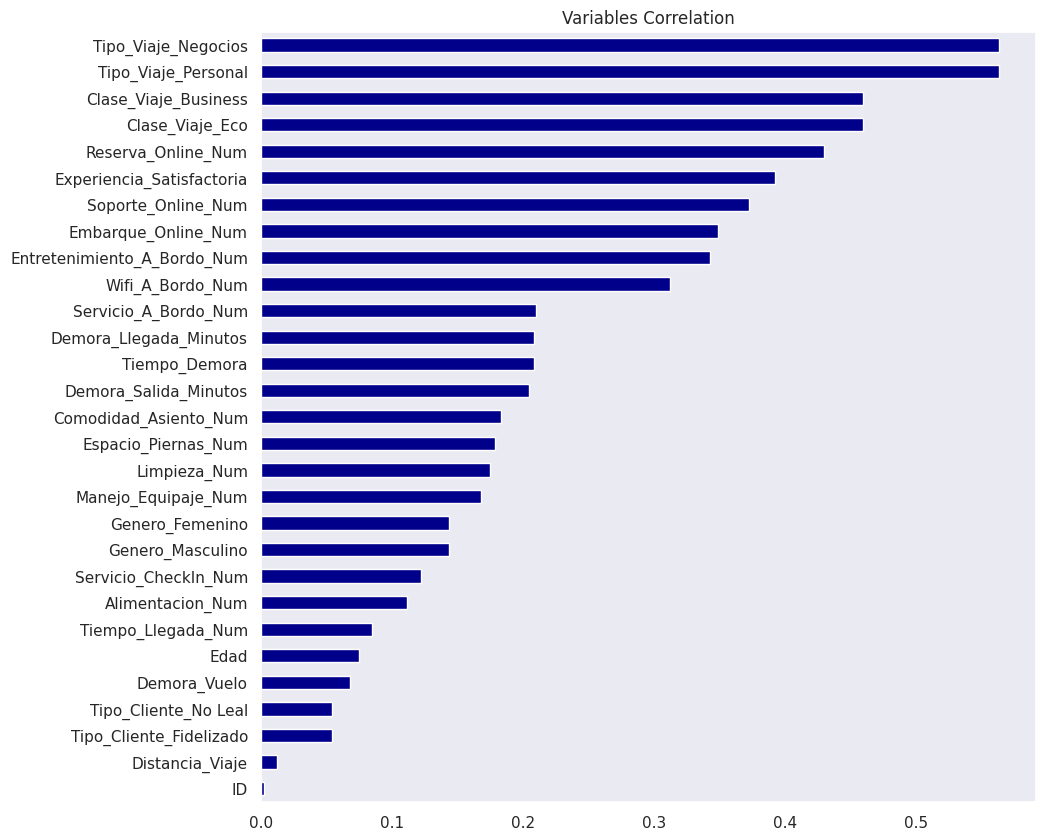

In [104]:
Data_clustered.corr().abs().Cluster.drop('Cluster').sort_values().plot.barh(color='darkblue',figsize=(10,10))
plt.title('Variables Correlation')

I export the clustered dataset to Excel to have a backup copy of the already clustered data.

In [105]:
Data_clustered.to_excel('DataClustered.xlsx', index = False)

# 7. Generate and Evaluate Model

In [106]:
Data_num

,ID,Edad,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Experiencia_Satisfactoria,Demora_Vuelo,Tiempo_Demora,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num,Genero_Femenino,Genero_Masculino,Tipo_Cliente_Fidelizado,Tipo_Cliente_No Leal,Tipo_Viaje_Negocios,Tipo_Viaje_Personal,Clase_Viaje_Business,Clase_Viaje_Eco
0,98800001,52.0,272,0.0,5.0,0,1,5.0,6,5,3,3,3,6,3,4,3,4,3,5,2,1,0,1,0,1,0,1,0
1,98800002,48.0,2200,9.0,0.0,0,1,9.0,2,5,2,6,2,6,5,5,5,3,2,3,5,0,1,1,0,0,1,0,1
2,98800003,43.0,1061,77.0,119.0,1,1,196.0,3,3,5,6,3,3,6,6,6,6,6,5,6,1,0,1,0,1,0,1,0
3,98800004,44.0,780,13.0,18.0,0,1,31.0,4,4,3,4,4,3,4,4,4,4,4,5,4,1,0,1,0,1,0,1,0
4,98800005,50.0,1981,0.0,0.0,1,0,0.0,4,3,5,5,4,4,5,6,5,5,5,5,5,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,98893996,44.0,1280,0.0,0.0,0,0,0.0,2,4,2,3,2,1,5,4,4,2,5,2,4,1,0,0,1,1,0,0,1
93996,98893997,70.0,2352,0.0,0.0,0,0,0.0,4,6,1,4,2,5,6,6,6,5,4,4,6,0,1,1,0,0,1,0,1
93997,98893998,43.0,5652,202.0,207.0,1,1,409.0,4,6,6,5,4,4,6,6,6,6,5,6,6,1,0,1,0,1,0,1,0
93998,98893999,44.0,1184,19.0,4.0,1,1,23.0,3,4,5,6,3,3,6,5,6,6,6,6,6,0,1,1,0,1,0,1,0


In [107]:
Data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94000 entries, 0 to 93999
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           94000 non-null  int64  
 1   Edad                         94000 non-null  float64
 2   Distancia_Viaje              94000 non-null  int64  
 3   Demora_Salida_Minutos        94000 non-null  float64
 4   Demora_Llegada_Minutos       94000 non-null  float64
 5   Experiencia_Satisfactoria    94000 non-null  int64  
 6   Demora_Vuelo                 94000 non-null  int64  
 7   Tiempo_Demora                94000 non-null  float64
 8   Alimentacion_Num             94000 non-null  int64  
 9   Wifi_A_Bordo_Num             94000 non-null  int64  
 10  Entretenimiento_A_Bordo_Num  94000 non-null  int64  
 11  Servicio_A_Bordo_Num         94000 non-null  int64  
 12  Comodidad_Asiento_Num        94000 non-null  int64  
 13  Tiempo_Llegada_N

I proceed to manage the existing missing values. I could eliminate them through the "Dropna" function but those records would be left out of the analysis for which I proceed to impute the null values ​​with the mean and the mode.

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [109]:
X = Data_num.drop('Experiencia_Satisfactoria', axis=1)
y = Data_num['Experiencia_Satisfactoria']

In [110]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94000 entries, 0 to 93999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           94000 non-null  int64  
 1   Edad                         94000 non-null  float64
 2   Distancia_Viaje              94000 non-null  int64  
 3   Demora_Salida_Minutos        94000 non-null  float64
 4   Demora_Llegada_Minutos       94000 non-null  float64
 5   Demora_Vuelo                 94000 non-null  int64  
 6   Tiempo_Demora                94000 non-null  float64
 7   Alimentacion_Num             94000 non-null  int64  
 8   Wifi_A_Bordo_Num             94000 non-null  int64  
 9   Entretenimiento_A_Bordo_Num  94000 non-null  int64  
 10  Servicio_A_Bordo_Num         94000 non-null  int64  
 11  Comodidad_Asiento_Num        94000 non-null  int64  
 12  Tiempo_Llegada_Num           94000 non-null  int64  
 13  Limpieza_Num    

Se resetean los indices

In [112]:
X = X.reset_index(drop=True)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.reset_index(drop = True, inplace = True)
X_test.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
y_test.reset_index(drop = True, inplace = True)

In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      8501
           1       0.84      0.85      0.84     10299

    accuracy                           0.83     18800
   macro avg       0.83      0.83      0.83     18800
weighted avg       0.83      0.83      0.83     18800

[[6848 1653]
 [1560 8739]]


### Decision Tree

In [119]:
from sklearn.tree import DecisionTreeClassifier


In [120]:
# Árbol de Decisión
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_decision_tree))
print(confusion_matrix(y_test, y_pred_decision_tree))



              precision    recall  f1-score   support

           0       0.92      0.91      0.91      8501
           1       0.93      0.93      0.93     10299

    accuracy                           0.92     18800
   macro avg       0.92      0.92      0.92     18800
weighted avg       0.92      0.92      0.92     18800

[[7756  745]
 [ 700 9599]]


### Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
# Bosque Aleatorio
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_random_forest))
print(confusion_matrix(y_test, y_pred_random_forest))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94      8501
           1       0.95      0.95      0.95     10299

    accuracy                           0.95     18800
   macro avg       0.95      0.95      0.95     18800
weighted avg       0.95      0.95      0.95     18800

[[8024  477]
 [ 510 9789]]


# 8. Predict Data

I repeat the data preprocessing using Test_Data

In [124]:
Test_1 = upload_files()
Test_1.head()

Saving Test Data_1 (1).csv to Test Data_1 (1) (1).csv
User uploaded file "Test Data_1 (1) (1).csv" with length 21590 bytes


,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos
0,98894001,Masculino,Fidelizado,47.0,NaN,Business,3374,0,0
1,98894002,Femenino,Fidelizado,51.0,Negocios,Business,1660,0,0
2,98894003,Femenino,No Leal,33.0,Negocios,Eco,2043,17,8
3,98894004,Femenino,NaN,50.0,Negocios,Eco,468,15,13
4,98894005,Masculino,Fidelizado,16.0,Personal,Eco,2267,0,0


In [125]:
Test_1['Demora_Llegada_Minutos'] = Test_1['Demora_Llegada_Minutos'].replace('N / A', 0).astype(float)
Test_1['Demora_Llegada_Minutos'] = Test_1['Demora_Llegada_Minutos'].astype(int)

In [126]:
Test_1['Demora_Vuelo'] = (Test_1['Demora_Salida_Minutos'] > 0) | (Test_1['Demora_Llegada_Minutos'] > 0)
Test_1['Demora_Vuelo'] = Test_1['Demora_Vuelo'].astype(int)

In [127]:
Test_1['Tiempo_Demora'] = Test_1['Demora_Salida_Minutos'] + Test_1['Demora_Llegada_Minutos']

In [128]:
Test_2 = upload_files()
Test_2.head()


Saving Test Data_2 (1).csv to Test Data_2 (1).csv
User uploaded file "Test Data_2 (1).csv" with length 56683 bytes


,ID,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online,Predicción
0,98894001,Excelente,Plus,Excelente,Excelente,Muy conveniente,Necesita mejorar,Bien,Bien,Bien,Bien,Bien,Bien,Excelente,Bien,Aceptable,NaN
1,98894002,Extremadamente pobre,Ordinario,Excelente,Extremadamente pobre,Manejable,Pobre,Necesita mejorar,Aceptable,Bien,Bien,Bien,Bien,Bien,Bien,Necesita mejorar,NaN
2,98894003,Pobre,Plus,Pobre,Pobre,Manejable,Pobre,Pobre,Pobre,Pobre,Aceptable,Aceptable,Necesita mejorar,Aceptable,Necesita mejorar,Pobre,NaN
3,98894004,Necesita mejorar,Plus,Aceptable,Excelente,Muy conveniente,Bien,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Necesita mejorar,Necesita mejorar,Pobre,Necesita mejorar,Excelente,NaN
4,98894005,Aceptable,Ordinario,Pobre,Aceptable,Manejable,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Aceptable,Aceptable,Aceptable,Pobre,Aceptable,Necesita mejorar,NaN


In [129]:
New_Data = pd.merge(Test_1, Test_2, on='ID', how='inner')
New_Data.head()

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Demora_Vuelo,Tiempo_Demora,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online,Predicción
0,98894001,Masculino,Fidelizado,47.0,NaN,Business,3374,0,0,0,0,Excelente,Plus,Excelente,Excelente,Muy conveniente,Necesita mejorar,Bien,Bien,Bien,Bien,Bien,Bien,Excelente,Bien,Aceptable,NaN
1,98894002,Femenino,Fidelizado,51.0,Negocios,Business,1660,0,0,0,0,Extremadamente pobre,Ordinario,Excelente,Extremadamente pobre,Manejable,Pobre,Necesita mejorar,Aceptable,Bien,Bien,Bien,Bien,Bien,Bien,Necesita mejorar,NaN
2,98894003,Femenino,No Leal,33.0,Negocios,Eco,2043,17,8,1,25,Pobre,Plus,Pobre,Pobre,Manejable,Pobre,Pobre,Pobre,Pobre,Aceptable,Aceptable,Necesita mejorar,Aceptable,Necesita mejorar,Pobre,NaN
3,98894004,Femenino,NaN,50.0,Negocios,Eco,468,15,13,1,28,Necesita mejorar,Plus,Aceptable,Excelente,Muy conveniente,Bien,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Necesita mejorar,Necesita mejorar,Pobre,Necesita mejorar,Excelente,NaN
4,98894005,Masculino,Fidelizado,16.0,Personal,Eco,2267,0,0,0,0,Aceptable,Ordinario,Pobre,Aceptable,Manejable,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Aceptable,Aceptable,Aceptable,Pobre,Aceptable,Necesita mejorar,NaN


I proceed to manage the existing missing values. I could eliminate them through the "Dropna" function but those records would be left out of the analysis for which I proceed to impute the null values ​​with the mean and the mode.

In [130]:
New_Data.to_excel('NewData.xlsx', index = False)

In [131]:
calidad_servicios = {
    'Muy Pobre': 1,
    'Pobre': 2,
    'Necesita Mejora': 3,
    'Aceptable': 4,
    'Bien': 5,
    'Excelente': 6
}

New_Data['Alimentacion_Num'] = New_Data['Alimentacion'].map(calidad_servicios)
New_Data['Wifi_A_Bordo_Num'] = New_Data['Wifi_A_Bordo'].map(calidad_servicios)
New_Data['Entretenimiento_A_Bordo_Num'] = New_Data['Entretenimiento_A_Bordo'].map(calidad_servicios)
New_Data['Servicio_A_Bordo_Num'] = New_Data['Servicio_A_Bordo'].map(calidad_servicios)
New_Data['Comodidad_Asiento_Num'] = New_Data['Comodidad_Asiento'].map(calidad_servicios)
New_Data['Tiempo_Llegada_Num'] = New_Data['Tiempo_Llegada'].map(calidad_servicios)
New_Data['Limpieza_Num'] = New_Data['Limpieza'].map(calidad_servicios)
New_Data['Soporte_Online_Num'] = New_Data['Soporte_Online'].map(calidad_servicios)
New_Data['Reserva_Online_Num'] = New_Data['Reserva_Online'].map(calidad_servicios)
New_Data['Espacio_Piernas_Num'] = New_Data['Espacio_Piernas'].map(calidad_servicios)
New_Data['Manejo_Equipaje_Num'] = New_Data['Manejo_Equipaje'].map(calidad_servicios)
New_Data['Servicio_CheckIn_Num'] = New_Data['Servicio_CheckIn'].map(calidad_servicios)
New_Data['Embarque_Online_Num'] = New_Data['Embarque_Online'].map(calidad_servicios)


In [144]:
New_Data = pd.get_dummies(New_Data, columns=[ 'Genero', 'Tipo_Cliente', 'Tipo_Viaje',  'Clase_Viaje'])

In [132]:
variables_numericas = New_Data.select_dtypes(include='number')
New_Data[variables_numericas.columns] = variables_numericas.fillna(variables_numericas.median())

In [133]:
variables_categoricas = New_Data.select_dtypes(include='object')
New_Data[variables_categoricas.columns] = variables_categoricas.apply(lambda x: x.fillna(x.mode()[0]))

In [134]:
New_Data_2 = New_Data.copy()

In [135]:
New_Data

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Demora_Vuelo,Tiempo_Demora,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online,Predicción,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num
0,98894001,Masculino,Fidelizado,47.0,Negocios,Business,3374,0,0,0,0,Excelente,Plus,Excelente,Excelente,Muy conveniente,Necesita mejorar,Bien,Bien,Bien,Bien,Bien,Bien,Excelente,Bien,Aceptable,NaN,6.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0
1,98894002,Femenino,Fidelizado,51.0,Negocios,Business,1660,0,0,0,0,Extremadamente pobre,Ordinario,Excelente,Extremadamente pobre,Manejable,Pobre,Necesita mejorar,Aceptable,Bien,Bien,Bien,Bien,Bien,Bien,Necesita mejorar,NaN,4.0,2.0,5.0,5.0,4.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
2,98894003,Femenino,No Leal,33.0,Negocios,Eco,2043,17,8,1,25,Pobre,Plus,Pobre,Pobre,Manejable,Pobre,Pobre,Pobre,Pobre,Aceptable,Aceptable,Necesita mejorar,Aceptable,Necesita mejorar,Pobre,NaN,2.0,2.0,2.0,4.0,2.0,2.0,5.0,2.0,2.0,4.0,5.0,4.0,2.0
3,98894004,Femenino,Fidelizado,50.0,Negocios,Eco,468,15,13,1,28,Necesita mejorar,Plus,Aceptable,Excelente,Muy conveniente,Bien,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Necesita mejorar,Necesita mejorar,Pobre,Necesita mejorar,Excelente,NaN,6.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,6.0
4,98894005,Masculino,Fidelizado,16.0,Personal,Eco,2267,0,0,0,0,Aceptable,Ordinario,Pobre,Aceptable,Manejable,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Aceptable,Aceptable,Aceptable,Pobre,Aceptable,Necesita mejorar,NaN,4.0,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,98894375,Masculino,Fidelizado,32.0,Negocios,Business,1357,83,125,1,208,Pobre,Ordinario,Bien,Bien,Conveniente,Pobre,Pobre,Pobre,Pobre,Bien,Bien,Bien,Necesita mejorar,Bien,Pobre,NaN,5.0,2.0,2.0,5.0,2.0,5.0,5.0,2.0,2.0,5.0,5.0,5.0,2.0
375,98894376,Masculino,Fidelizado,44.0,Negocios,Business,592,5,11,1,16,Bien,Ordinario,Bien,Bien,Conveniente,Necesita mejorar,Excelente,Excelente,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Bien,NaN,5.0,5.0,6.0,4.0,5.0,5.0,4.0,6.0,4.0,4.0,4.0,5.0,5.0
376,98894377,Masculino,Fidelizado,63.0,Negocios,Business,2794,0,0,0,0,Necesita mejorar,Plus,Necesita mejorar,Necesita mejorar,Necesita mejorar,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Aceptable,Bien,Aceptable,NaN,4.0,5.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
377,98894378,Masculino,Fidelizado,16.0,Personal,Eco,2744,0,0,0,0,Necesita mejorar,Ordinario,Bien,Necesita mejorar,Conveniente,Bien,Necesita mejorar,Bien,Bien,Aceptable,Bien,Bien,Bien,Excelente,Bien,NaN,4.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0


In [136]:
New_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 378
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           379 non-null    int64  
 1   Genero                       379 non-null    object 
 2   Tipo_Cliente                 379 non-null    object 
 3   Edad                         379 non-null    float64
 4   Tipo_Viaje                   379 non-null    object 
 5   Clase_Viaje                  379 non-null    object 
 6   Distancia_Viaje              379 non-null    int64  
 7   Demora_Salida_Minutos        379 non-null    int64  
 8   Demora_Llegada_Minutos       379 non-null    int64  
 9   Demora_Vuelo                 379 non-null    int64  
 10  Tiempo_Demora                379 non-null    int64  
 11  Comodidad_Asiento            379 non-null    object 
 12  Clase_Asiento                379 non-null    object 
 13  Tiempo_Llegada      

In [145]:
New_Data_num = New_Data.select_dtypes(include=[np.number])

In [146]:
New_Data_num

,ID,Edad,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Demora_Vuelo,Tiempo_Demora,Predicción,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num,Genero_Femenino,Genero_Masculino,Tipo_Cliente_Fidelizado,Tipo_Cliente_No Leal,Tipo_Viaje_Negocios,Tipo_Viaje_Personal,Clase_Viaje_Business,Clase_Viaje_Eco
0,98894001,47.0,3374,0,0,0,0,NaN,6.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,0,1,1,0,1,0,1,0
1,98894002,51.0,1660,0,0,0,0,NaN,4.0,2.0,5.0,5.0,4.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,1,0,1,0,1,0,1,0
2,98894003,33.0,2043,17,8,1,25,NaN,2.0,2.0,2.0,4.0,2.0,2.0,5.0,2.0,2.0,4.0,5.0,4.0,2.0,1,0,0,1,1,0,0,1
3,98894004,50.0,468,15,13,1,28,NaN,6.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,6.0,1,0,1,0,1,0,0,1
4,98894005,16.0,2267,0,0,0,0,NaN,4.0,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,2.0,5.0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,98894375,32.0,1357,83,125,1,208,NaN,5.0,2.0,2.0,5.0,2.0,5.0,5.0,2.0,2.0,5.0,5.0,5.0,2.0,0,1,1,0,1,0,1,0
375,98894376,44.0,592,5,11,1,16,NaN,5.0,5.0,6.0,4.0,5.0,5.0,4.0,6.0,4.0,4.0,4.0,5.0,5.0,0,1,1,0,1,0,1,0
376,98894377,63.0,2794,0,0,0,0,NaN,4.0,5.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,0,1,1,0,1,0,1,0
377,98894378,16.0,2744,0,0,0,0,NaN,4.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,0,1,1,0,0,1,0,1


In [147]:
X1 = New_Data_num.drop('Predicción', axis=1)
y1 = New_Data_num['Predicción']

In [148]:
X1

,ID,Edad,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Demora_Vuelo,Tiempo_Demora,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num,Genero_Femenino,Genero_Masculino,Tipo_Cliente_Fidelizado,Tipo_Cliente_No Leal,Tipo_Viaje_Negocios,Tipo_Viaje_Personal,Clase_Viaje_Business,Clase_Viaje_Eco
0,98894001,47.0,3374,0,0,0,0,6.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0,0,1,1,0,1,0,1,0
1,98894002,51.0,1660,0,0,0,0,4.0,2.0,5.0,5.0,4.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,1,0,1,0,1,0,1,0
2,98894003,33.0,2043,17,8,1,25,2.0,2.0,2.0,4.0,2.0,2.0,5.0,2.0,2.0,4.0,5.0,4.0,2.0,1,0,0,1,1,0,0,1
3,98894004,50.0,468,15,13,1,28,6.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,6.0,1,0,1,0,1,0,0,1
4,98894005,16.0,2267,0,0,0,0,4.0,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,2.0,5.0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,98894375,32.0,1357,83,125,1,208,5.0,2.0,2.0,5.0,2.0,5.0,5.0,2.0,2.0,5.0,5.0,5.0,2.0,0,1,1,0,1,0,1,0
375,98894376,44.0,592,5,11,1,16,5.0,5.0,6.0,4.0,5.0,5.0,4.0,6.0,4.0,4.0,4.0,5.0,5.0,0,1,1,0,1,0,1,0
376,98894377,63.0,2794,0,0,0,0,4.0,5.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,0,1,1,0,1,0,1,0
377,98894378,16.0,2744,0,0,0,0,4.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,0,1,1,0,0,1,0,1


In [149]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 0 to 378
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           379 non-null    int64  
 1   Edad                         379 non-null    float64
 2   Distancia_Viaje              379 non-null    int64  
 3   Demora_Salida_Minutos        379 non-null    int64  
 4   Demora_Llegada_Minutos       379 non-null    int64  
 5   Demora_Vuelo                 379 non-null    int64  
 6   Tiempo_Demora                379 non-null    int64  
 7   Alimentacion_Num             379 non-null    float64
 8   Wifi_A_Bordo_Num             379 non-null    float64
 9   Entretenimiento_A_Bordo_Num  379 non-null    float64
 10  Servicio_A_Bordo_Num         379 non-null    float64
 11  Comodidad_Asiento_Num        379 non-null    float64
 12  Tiempo_Llegada_Num           379 non-null    float64
 13  Limpieza_Num        

I make the predictions using the previously trained model.

In [150]:
x1_scaled = scaler.transform(X1)
y_pred_new = model.predict(x1_scaled)
print(y_pred_new)

[1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 1 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1
 0 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1
 1 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 1
 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1
 0 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 1 0]


In [151]:
New_Data_2['Predicción'] = y_pred_new

In [152]:
New_Data_2

,ID,Genero,Tipo_Cliente,Edad,Tipo_Viaje,Clase_Viaje,Distancia_Viaje,Demora_Salida_Minutos,Demora_Llegada_Minutos,Demora_Vuelo,Tiempo_Demora,Comodidad_Asiento,Clase_Asiento,Tiempo_Llegada,Alimentacion,Ubicacion_Plataforma,Wifi_A_Bordo,Entretenimiento_A_Bordo,Soporte_Online,Reserva_Online,Servicio_A_Bordo,Espacio_Piernas,Manejo_Equipaje,Servicio_CheckIn,Limpieza,Embarque_Online,Predicción,Alimentacion_Num,Wifi_A_Bordo_Num,Entretenimiento_A_Bordo_Num,Servicio_A_Bordo_Num,Comodidad_Asiento_Num,Tiempo_Llegada_Num,Limpieza_Num,Soporte_Online_Num,Reserva_Online_Num,Espacio_Piernas_Num,Manejo_Equipaje_Num,Servicio_CheckIn_Num,Embarque_Online_Num
0,98894001,Masculino,Fidelizado,47.0,Negocios,Business,3374,0,0,0,0,Excelente,Plus,Excelente,Excelente,Muy conveniente,Necesita mejorar,Bien,Bien,Bien,Bien,Bien,Bien,Excelente,Bien,Aceptable,1,6.0,5.0,5.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0,6.0,4.0
1,98894002,Femenino,Fidelizado,51.0,Negocios,Business,1660,0,0,0,0,Extremadamente pobre,Ordinario,Excelente,Extremadamente pobre,Manejable,Pobre,Necesita mejorar,Aceptable,Bien,Bien,Bien,Bien,Bien,Bien,Necesita mejorar,1,4.0,2.0,5.0,5.0,4.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0
2,98894003,Femenino,No Leal,33.0,Negocios,Eco,2043,17,8,1,25,Pobre,Plus,Pobre,Pobre,Manejable,Pobre,Pobre,Pobre,Pobre,Aceptable,Aceptable,Necesita mejorar,Aceptable,Necesita mejorar,Pobre,0,2.0,2.0,2.0,4.0,2.0,2.0,5.0,2.0,2.0,4.0,5.0,4.0,2.0
3,98894004,Femenino,Fidelizado,50.0,Negocios,Eco,468,15,13,1,28,Necesita mejorar,Plus,Aceptable,Excelente,Muy conveniente,Bien,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Necesita mejorar,Necesita mejorar,Pobre,Necesita mejorar,Excelente,1,6.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,2.0,6.0
4,98894005,Masculino,Fidelizado,16.0,Personal,Eco,2267,0,0,0,0,Aceptable,Ordinario,Pobre,Aceptable,Manejable,Necesita mejorar,Aceptable,Necesita mejorar,Necesita mejorar,Aceptable,Aceptable,Aceptable,Pobre,Aceptable,Necesita mejorar,0,4.0,5.0,4.0,4.0,4.0,2.0,4.0,5.0,5.0,4.0,4.0,2.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,98894375,Masculino,Fidelizado,32.0,Negocios,Business,1357,83,125,1,208,Pobre,Ordinario,Bien,Bien,Conveniente,Pobre,Pobre,Pobre,Pobre,Bien,Bien,Bien,Necesita mejorar,Bien,Pobre,0,5.0,2.0,2.0,5.0,2.0,5.0,5.0,2.0,2.0,5.0,5.0,5.0,2.0
375,98894376,Masculino,Fidelizado,44.0,Negocios,Business,592,5,11,1,16,Bien,Ordinario,Bien,Bien,Conveniente,Necesita mejorar,Excelente,Excelente,Aceptable,Aceptable,Aceptable,Aceptable,Bien,Aceptable,Bien,1,5.0,5.0,6.0,4.0,5.0,5.0,4.0,6.0,4.0,4.0,4.0,5.0,5.0
376,98894377,Masculino,Fidelizado,63.0,Negocios,Business,2794,0,0,0,0,Necesita mejorar,Plus,Necesita mejorar,Necesita mejorar,Necesita mejorar,Bien,Excelente,Bien,Bien,Bien,Bien,Bien,Aceptable,Bien,Aceptable,1,4.0,5.0,6.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0
377,98894378,Masculino,Fidelizado,16.0,Personal,Eco,2744,0,0,0,0,Necesita mejorar,Ordinario,Bien,Necesita mejorar,Conveniente,Bien,Necesita mejorar,Bien,Bien,Aceptable,Bien,Bien,Bien,Excelente,Bien,1,4.0,5.0,5.0,4.0,4.0,5.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0


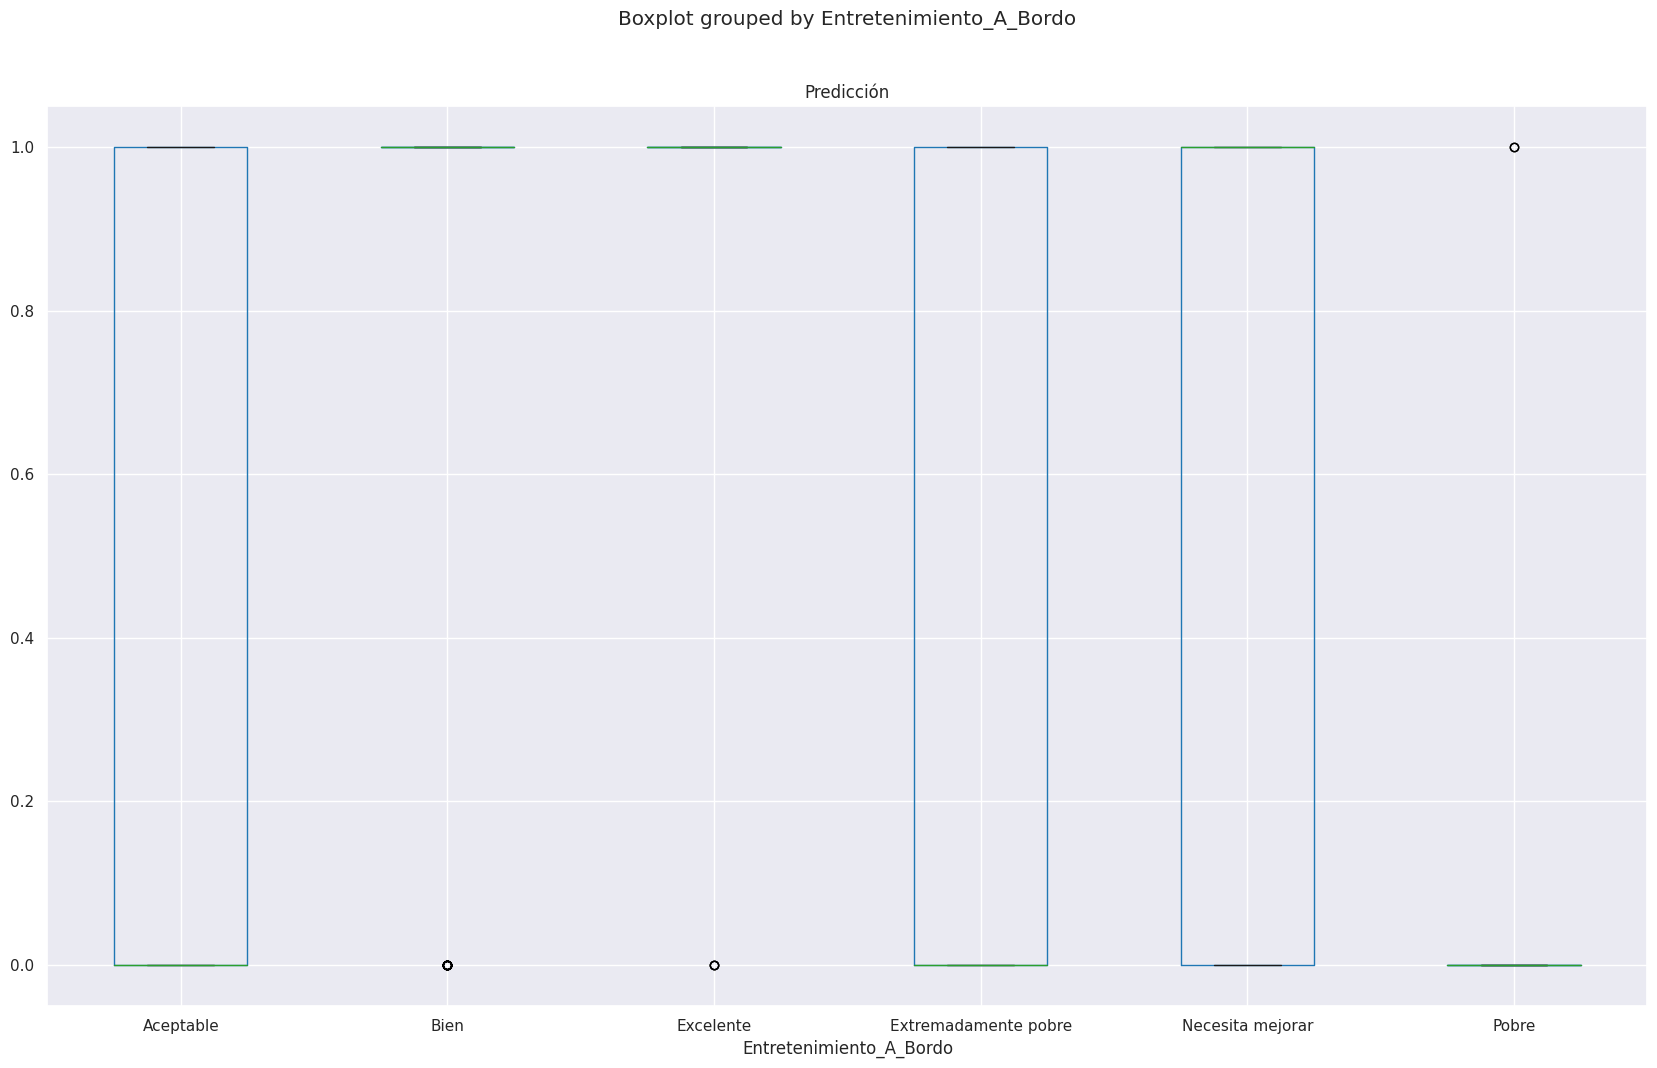

In [153]:
New_Data_2.boxplot(column='Predicción', by='Entretenimiento_A_Bordo', figsize = (20,12));

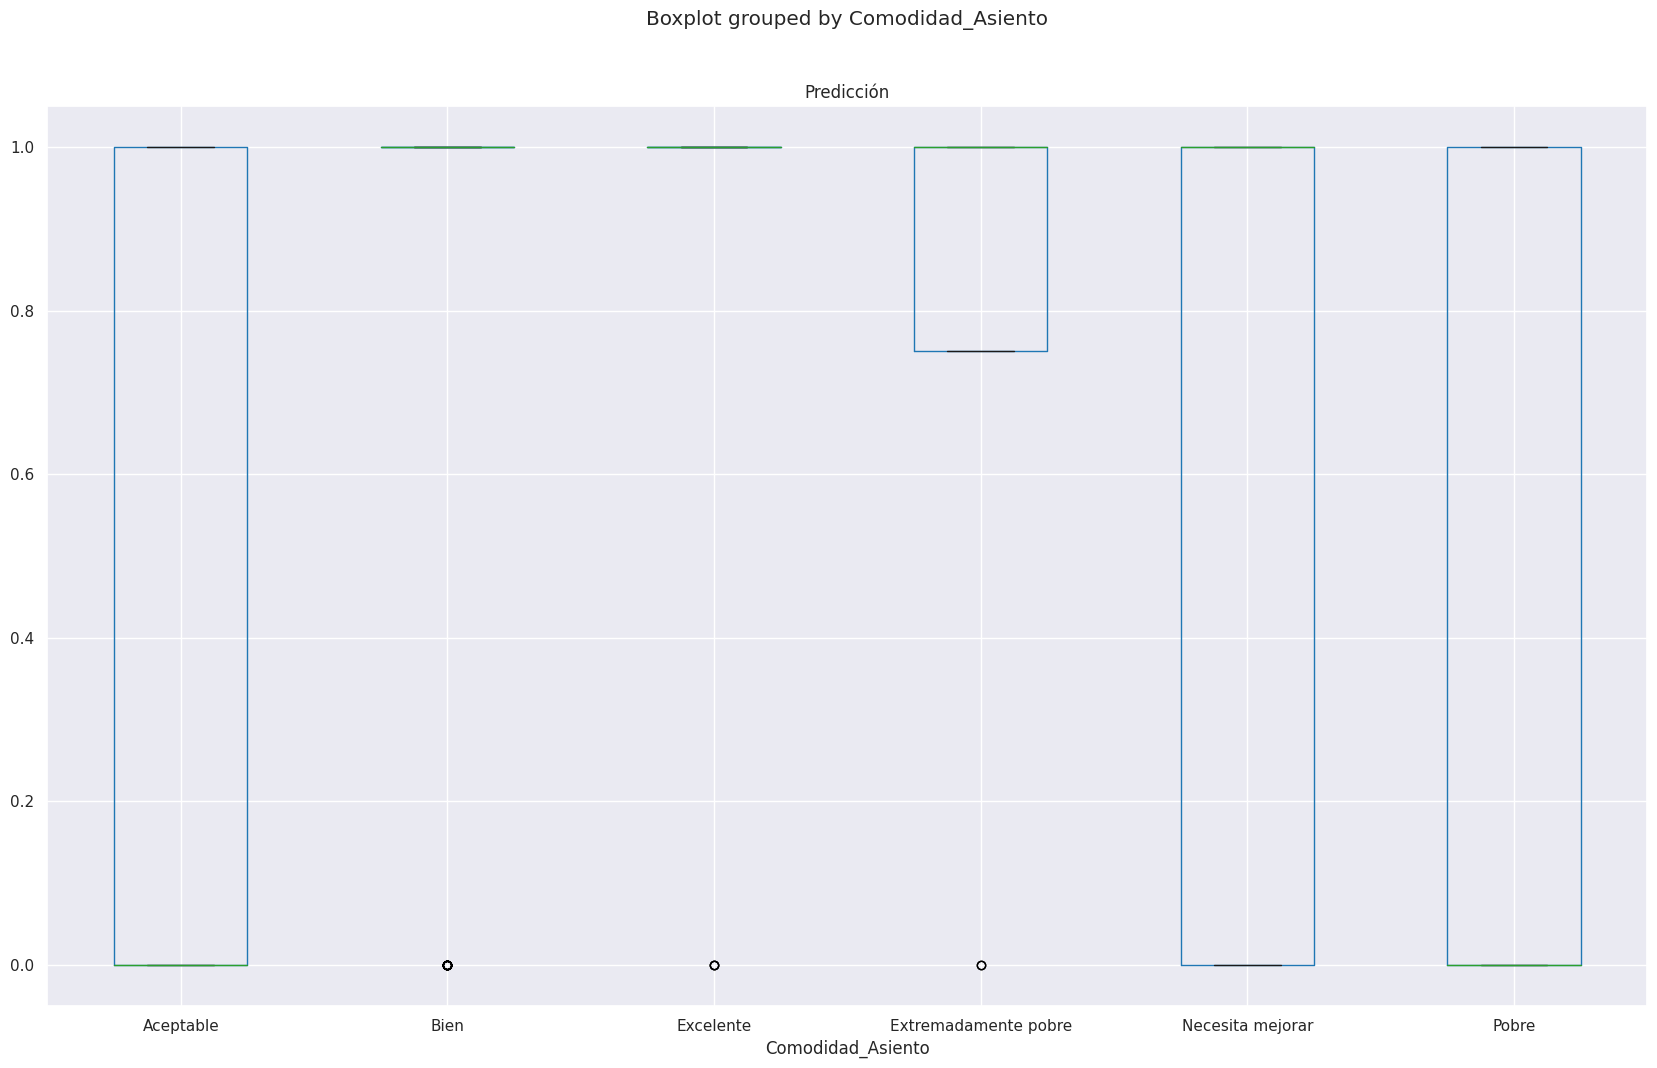

In [155]:
New_Data_2.boxplot(column='Predicción', by='Comodidad_Asiento', figsize = (20,12));

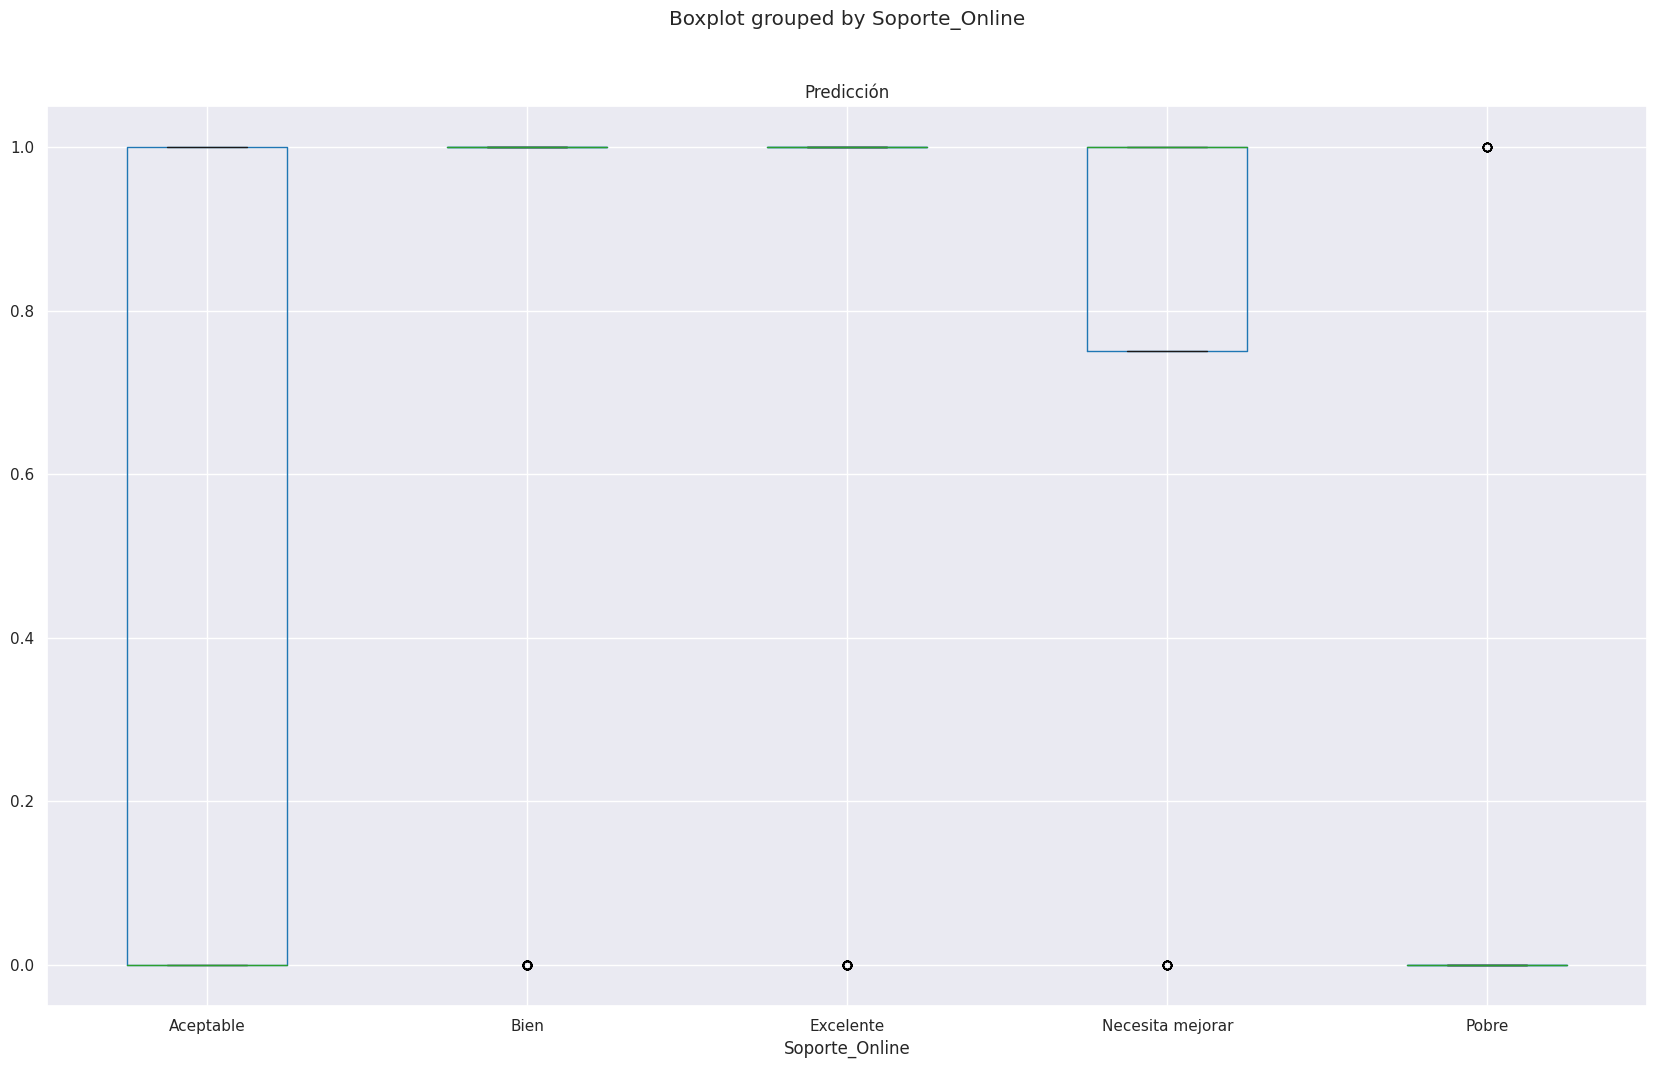

In [156]:
New_Data_2.boxplot(column='Predicción', by='Soporte_Online', figsize = (20,12));

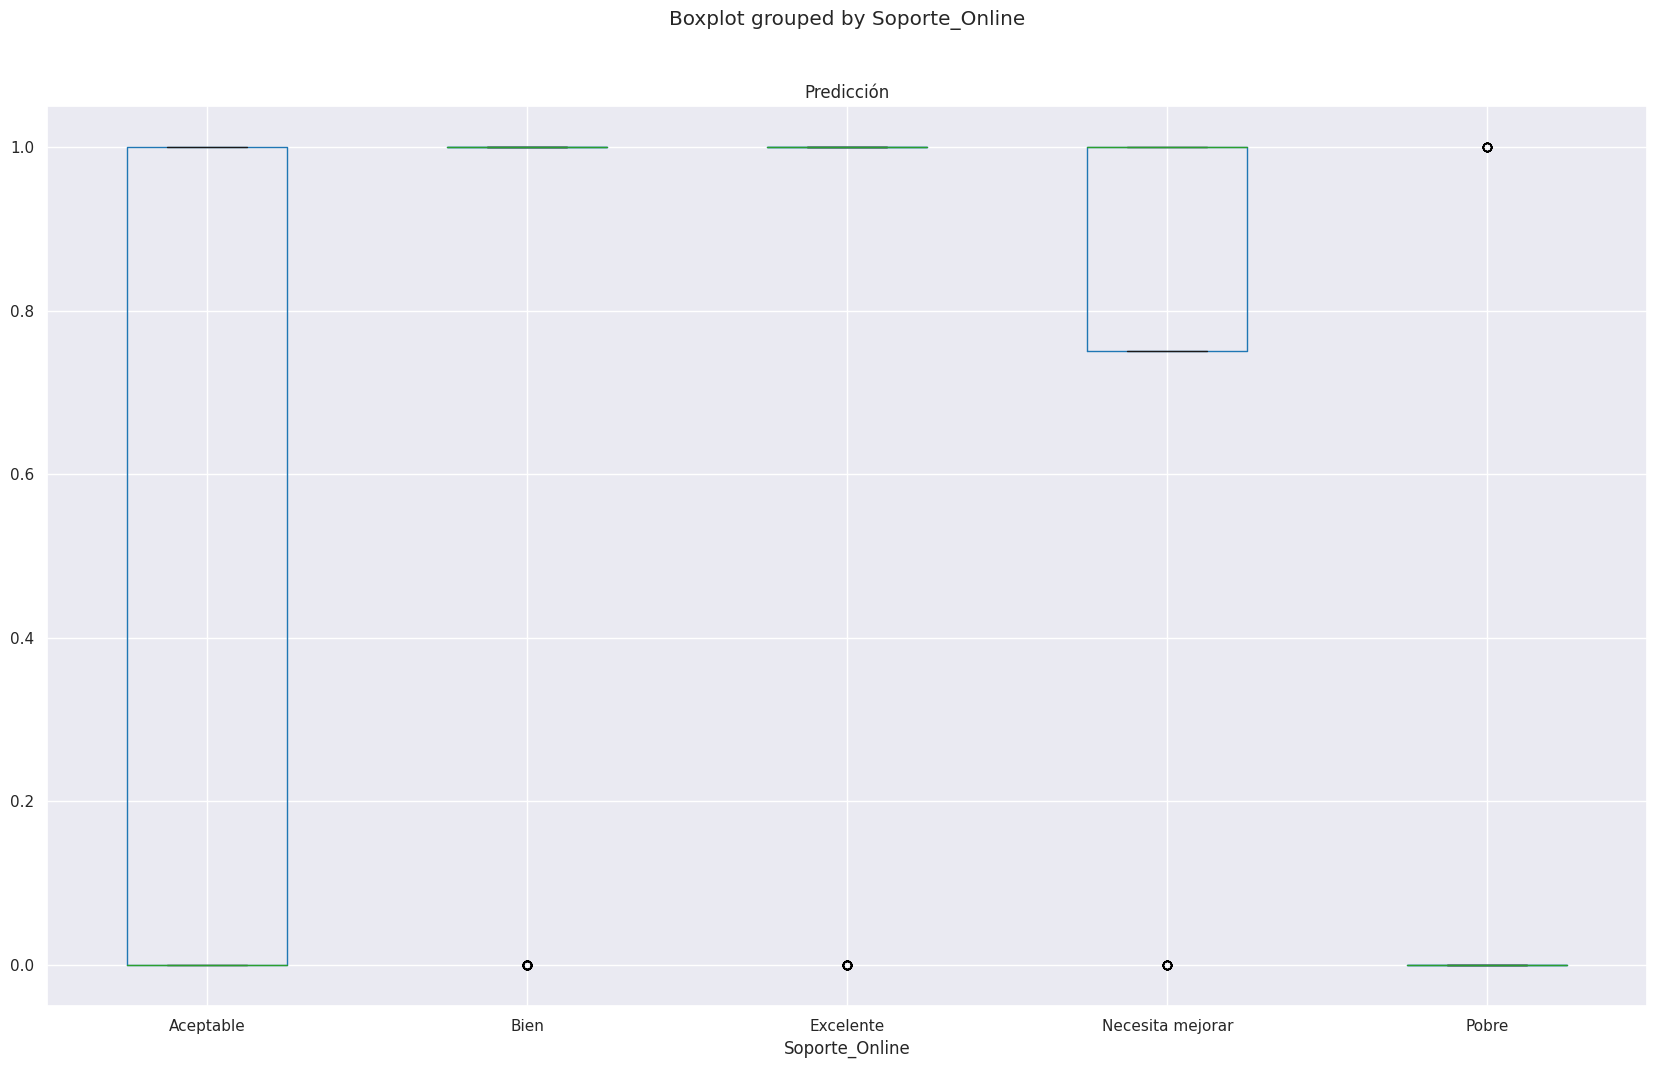

In [157]:
New_Data_2.boxplot(column='Predicción', by='Soporte_Online', figsize = (20,12));

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#10. Additionals

## Modelos

Se importan y se declaran los modelos de clasifiación a utilizar.

In [ ]:
from sklearn.tree import DecisionTreeClassifier   # Árbol de decisión
arbol = DecisionTreeClassifier()


from sklearn.ensemble import RandomForestClassifier   # Random forest
random_forest = RandomForestClassifier()

from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting
gradient_boosting = GradientBoostingClassifier()

from sklearn.preprocessing import StandardScaler     # importamos StandardScaler para realizar la estandarización cuando sea necesaria
from sklearn.feature_selection import RFECV, SelectKBest, f_classif  # importanmos RFECV y SeleckBest que los usaré para la selección de variables

from sklearn.linear_model import LogisticRegression
logreg_rfecv = Pipeline(steps=[("scaler",StandardScaler()),
                               ("rfecv",RFECV(estimator=LogisticRegression())),   #Aquí usamos regresión logística usando la selección RFECV
                               ("logreg",LogisticRegression())
                              ]
                       )

from sklearn.neighbors import KNeighborsClassifier
neighbors = Pipeline(steps=[("scaler",StandardScaler()),  # KNeighbors sin realizar selección de variables.
                            ("knn",KNeighborsClassifier())
                          ]
                   )

from sklearn.svm import SVC
svm = Pipeline(steps=[("scaler",StandardScaler()), # Support Vector Machine, kernel es brf por defecto
                      ("svm",SVC())
                     ]
              )

## Hiperparametros

Se describen los hiperparametros a utilizar para cada modelo

In [ ]:
grid_arbol = {"max_depth":list(range(1,11))}# Profundidades de 1 a 10

In [ ]:
grid_random_forest = {"n_estimators": [150],

                     "max_depth": [3,5,10,15,20],

                     "max_features": ["sqrt", 3, 4]}

In [ ]:
grid_gradient_boosting = {"loss": ["deviance"],
                          "learning_rate": [0.05, 0.1, 0.5], # Una learning_rate alta
                                                             # junto con n_estimators alta puede dar sobreajuste.

                          "n_estimators": [20,50,100,200], # En GBT un número
                                                           # elevado de árboles puede darnos sobreajuste.

                          "max_depth": [1,2,3,4,5], # En boosting, los árboles utilizados deben tener poca
                                                    # profundidad ya que van rectificandose poco a poco de forma aditiva.

                          "subsample": [1.0, 0.8, 0.5], # Lo usamos para evitar el sobreentrenamiento

                          "max_features": ["sqrt", 3, 4], }

In [ ]:
grid_logreg_rfecv = {"rfecv__step": [1],
                     "rfecv__cv": [5],

                     "logreg__penalty": ["l1","l2"], # Regularizaciones L1 y L2 para evitar overfitting.
                     "logreg__C": [0.1, 0.8, 5.0], # Con este parámetro elegimos la fuerza de regulación
                     "logreg__fit_intercept": [True],

                     "logreg__max_iter": [50,100,500],

                     "logreg__solver": ["liblinear"]
                    }

In [ ]:
grid_neighbors = {"knn__n_neighbors": [3,5,7,9,11],
                  "knn__weights": ["uniform","distance"]  # Pondera o no las clasificaciones en
                                                          # función de la inversa de la distancia a cada
                                                          # vecino
                  }

In [ ]:
grid_svm = {"svm__C": [0.1, 5.0, 50.0],
            "svm__kernel": ["rbf"],
            "svm__gamma": [0.001, 1, 10.0]
           }

## Grid Search y K-Folds



importo la clase GridSearchCV de la biblioteca sklearn.model_selection, que se utiliza para ajustar los hiperparámetros de un modelo de aprendizaje automático mediante la búsqueda exhaustiva en una parrilla de valores de hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gs_arbol = GridSearchCV(arbol,
                        grid_arbol,
                        cv=10,
                        scoring="f1_micro",
                        verbose=1,
                        n_jobs=-1)

gs_random_forest = GridSearchCV(random_forest,
                                grid_random_forest,
                                cv=10,
                                scoring='f1_micro',
                                verbose=1,
                                n_jobs=-1)

gs_gradient_boosting = GridSearchCV(gradient_boosting,
                                    grid_gradient_boosting,
                                    cv=10,
                                    scoring='f1_micro',
                                    verbose=1,
                                    n_jobs=-1)

gs_logreg_rfecv = GridSearchCV(logreg_rfecv,
                               grid_logreg_rfecv,
                               cv=10,
                               scoring='f1_micro',
                               verbose=1,
                               n_jobs=-1)

gs_neighbors = GridSearchCV(neighbors,
                            grid_neighbors,
                            cv=10,
                            scoring='f1_micro',
                            verbose=1,
                            n_jobs=-1)

gs_svm = GridSearchCV(svm,
                      grid_svm,
                      cv=10,
                      scoring='f1_micro',
                      verbose=1,
                      n_jobs=-1)

En un diccionario organizo los modelos de clasificación con su clave respectiva

In [ ]:
todos_los_grid_searchs = {"gs_arbol":gs_arbol,
                          "gs_random_forest":gs_random_forest,
                        "gs_svm":gs_svm,

}

Por medio de un ciclo "for" se realiza la iteración de los modelos especificados en el diccionario "todos_los_grid_searchs" teniendo en cuenta los hiperparametros asignados. Cada modelo se ajusta al conjunto de entrenamiento y devuelve los mejores valores encontrados.

In [ ]:
for nombre, grid_search in todos_los_grid_searchs.items():
    print("Haciendo Grid Search de %s..." % nombre)
    grid_search.fit(train_X, train_y)

Haciendo Grid Search de gs_arbol...
Fitting 10 folds for each of 10 candidates, totalling 100 fits
Haciendo Grid Search de gs_random_forest...
Fitting 10 folds for each of 15 candidates, totalling 150 fits
Haciendo Grid Search de gs_svm...
Fitting 10 folds for each of 9 candidates, totalling 90 fits


Se genera una tupla con los modelos de clasificaicón y el mejor resultado obtenido por medio del gridsearchpara cada modelo.

In [ ]:
mejor_score_de_cada_gridsearch = [(nombre_modelo, grid_search.best_score_) # Generamos una tupla
                                  for nombre_modelo, grid_search           # por cada par clave-valor
                                  in todos_los_grid_searchs.items()]       # del diccionario

Se visualiza la tupla

In [ ]:
mejor_score_de_cada_gridsearch

[('gs_arbol', 0.9963768115942029),
 ('gs_random_forest', 0.9978260869565216),
 ('gs_svm', 0.9956521739130435)]

Se genera un nuevo dataframe con los datos de la tupla, posteriomente se ordenan los datos y se visualiza.

In [ ]:
mejor_score_de_cada_gridsearch_df = pd.DataFrame(mejor_score_de_cada_gridsearch,
                                                 columns=["GridSearchCV", "Mejor score"])

mejor_score_de_cada_gridsearch_df_ordenado = (mejor_score_de_cada_gridsearch_df
                                              .sort_values(by="Mejor score", ascending=False)
                                             )

mejor_score_de_cada_gridsearch_df_ordenado

,GridSearchCV,Mejor score
1,gs_random_forest,0.997826
0,gs_arbol,0.996377
2,gs_svm,0.995652


Se selecciona el objeto del diccionario "todos_los_grid_searchs" correspodiente al algoritmo de Random Forest y se asigná a la variable mejor_gridsearch_clas.

In [ ]:
mejor_gridsearch_clas = todos_los_grid_searchs["gs_random_forest"]

Se aplica el mejor estimador al objetivo "gs_random_forest" para obtener mejores resultados.

In [ ]:
mejor_pipeline = mejor_gridsearch_clas.best_estimator_
mejor_pipeline

RandomForestClassifier(max_depth=3, n_estimators=150)

In [ ]:
mejor_pipeline.fit(train_X, train_y)

RandomForestClassifier(max_depth=3, n_estimators=150)

Se utilizo la metrica f1 score para evaluar el modelo.

In [ ]:
from sklearn.metrics import f1_score
f1_en_test = f1_score(y_true = test_y, y_pred = mejor_pipeline.predict(test_X), average="micro")
print("El modelo tiene un f1 en el conjunto de test de %s" % f1_en_test)

El modelo tiene un f1 en el conjunto de test de 0.9978308026030369


Se utilizo la metrica Acuraccy para evaluar el modelo.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_en_test = accuracy_score(y_true = test_y,y_pred = mejor_pipeline.predict(test_X))
print("El modelo tiene un accuracy en el conjunto de test de %s" % accuracy_en_test)

El modelo tiene un accuracy en el conjunto de test de 0.9978308026030369


Se construyo la matriz de confusión para el modelo seleccionado con fue obtenido el mejor resultado de acuerdo a la gridsearch.

In [ ]:
from sklearn.metrics import confusion_matrix
matriz_confusion = confusion_matrix(y_true = test_y,
                                    y_pred = mejor_pipeline.predict(test_X)
                                   )
matriz_confusion

array([[183,   0,   0],
       [  0, 111,   1],
       [  0,   0, 166]])

In [ ]:
matriz_confusion_df = pd.DataFrame(matriz_confusion)

# Y nombramos lo que son las columnas y las filas:
matriz_confusion_df.columns.name = "Predicho"
matriz_confusion_df.index.name = "Real"
matriz_confusion_df

Predicho,0,1,2
Real,,,
0,183,0,0
1,0,111,1
2,0,0,166


Se genera el grafico de la matriz de conussión

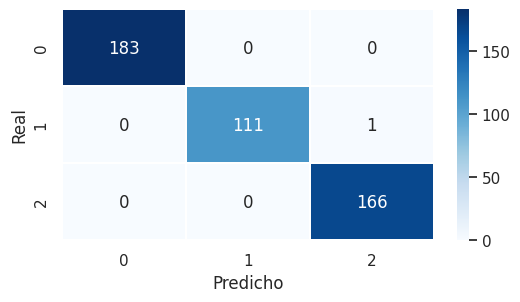

In [ ]:
plt.figure(figsize=(6,3))
sns.heatmap(matriz_confusion_df,
            annot=True,
            cmap="Blues",linewidths=.10, fmt= '.0f')
pass